## Objective
### ---> The aim behind this project is to find which customers are likely to convert their free membership to paid membership by performing descriptive & predictive analysis.
 * Perform data quality assessment
 * Identify the customers that are likely to convert to paid membership
 * Finding customers who utilize Insider membership
 * Investigating how different variables impact conversion to paid membership
 * Build a prediction model to see which features are important. 

# Individual variable description (movie industry)

## Import packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from datetime import datetime

#to view entire column
pd.set_option('display.max_colwidth', None)
# To see full column names
pd.set_option('display.max_columns',None)

# correlation analysis
import scipy.stats  as stats
from scipy.stats import pearsonr

# Data preprocessor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#import RandomForest classifier
from sklearn.ensemble import RandomForestClassifier


#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#regression packages
import sklearn.linear_model as lm

# import random forest packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# K-means 
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances



import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(suppress=True, formatter={'float_kind':'{:.2f}'.format})


# Section 1. Business Intelligence

## 1. Part I: Data import & data quality assessment

### A  - Read Data file

In [9]:
# Read data

data = pd.read_csv('InsiderPremier.csv')
data.head(2)

,ISPREMIER,AGE21PLUSINDICATOR,AGE18TO21INDICATOR,AGE13TO18INDICATOR,GENDERCODE,BIRTHDATE,LOYALTYEMAILOFFEROPTININDICATOR,REWARDSEMAILOPTININDICATOR,REWARDSMOBILEOPTININDICATOR,REWARDSSMSOPTININDICATOR,THEATREMOBILEOFFEROPTININDICATOR,THEATRESMSOFFEROPTININDICATOR,LIFETIMEAWARDSEARNEDAMOUNT,LIFETIMESPENDAMOUNT,ONLINEFEESWAIVEDAMOUNT,ESTIMATEDINCOMERANGE,ESTIMATEDHOMEMARKETVALUERANGE,CHILDRENPRESENCE,HASFREQUENTVISITTHEATRENUMBER,TICKETQTYSUM,TICKETBALANCEDUESUM,CONCQTYSUM,CONCLOYDISCOUNTAMTSUM,CONCBALANCEDUESUM
0,1,0,0,0,0,1/26/2016,1,1,0,0,0.00,0,0.00,0.00,0.00,8,19,0,0,2,29.58,0,0.00,0.00
1,1,0,0,1,3,1/1/2001,1,1,1,0,1.00,0,5.00,-63.04,0.00,8,19,3,1,20,191.90,0,0.00,0.00


### B - Data quality assessment 

In [12]:
# check data types and other information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47169 entries, 0 to 47168
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ISPREMIER                         47169 non-null  int64  
 1   AGE21PLUSINDICATOR                47169 non-null  int64  
 2   AGE18TO21INDICATOR                47169 non-null  int64  
 3   AGE13TO18INDICATOR                47169 non-null  int64  
 4   GENDERCODE                        47169 non-null  int64  
 5   BIRTHDATE                         47169 non-null  object 
 6   LOYALTYEMAILOFFEROPTININDICATOR   47169 non-null  int64  
 7   REWARDSEMAILOPTININDICATOR        47169 non-null  int64  
 8   REWARDSMOBILEOPTININDICATOR       47169 non-null  int64  
 9   REWARDSSMSOPTININDICATOR          47169 non-null  int64  
 10  THEATREMOBILEOFFEROPTININDICATOR  47166 non-null  float64
 11  THEATRESMSOFFEROPTININDICATOR     47169 non-null  int64  
 12  LIFE

In [14]:
# number of rows and columns
data.shape

(47169, 24)

In [16]:
# Missing value 
data.isnull().sum()

ISPREMIER                           0
AGE21PLUSINDICATOR                  0
AGE18TO21INDICATOR                  0
AGE13TO18INDICATOR                  0
GENDERCODE                          0
BIRTHDATE                           0
LOYALTYEMAILOFFEROPTININDICATOR     0
REWARDSEMAILOPTININDICATOR          0
REWARDSMOBILEOPTININDICATOR         0
REWARDSSMSOPTININDICATOR            0
THEATREMOBILEOFFEROPTININDICATOR    3
THEATRESMSOFFEROPTININDICATOR       0
LIFETIMEAWARDSEARNEDAMOUNT          0
LIFETIMESPENDAMOUNT                 0
ONLINEFEESWAIVEDAMOUNT              0
ESTIMATEDINCOMERANGE                0
ESTIMATEDHOMEMARKETVALUERANGE       0
CHILDRENPRESENCE                    0
HASFREQUENTVISITTHEATRENUMBER       0
TICKETQTYSUM                        0
TICKETBALANCEDUESUM                 0
CONCQTYSUM                          0
CONCLOYDISCOUNTAMTSUM               0
CONCBALANCEDUESUM                   0
dtype: int64

In [18]:
# Summary statistic 
data.describe()

,ISPREMIER,AGE21PLUSINDICATOR,AGE18TO21INDICATOR,AGE13TO18INDICATOR,GENDERCODE,LOYALTYEMAILOFFEROPTININDICATOR,REWARDSEMAILOPTININDICATOR,REWARDSMOBILEOPTININDICATOR,REWARDSSMSOPTININDICATOR,THEATREMOBILEOFFEROPTININDICATOR,THEATRESMSOFFEROPTININDICATOR,LIFETIMEAWARDSEARNEDAMOUNT,LIFETIMESPENDAMOUNT,ONLINEFEESWAIVEDAMOUNT,ESTIMATEDINCOMERANGE,ESTIMATEDHOMEMARKETVALUERANGE,CHILDRENPRESENCE,HASFREQUENTVISITTHEATRENUMBER,TICKETQTYSUM,TICKETBALANCEDUESUM,CONCQTYSUM,CONCLOYDISCOUNTAMTSUM,CONCBALANCEDUESUM
count,"47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,166.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00"
mean,0.12,0.89,0.06,0.04,2.46,0.82,0.86,0.50,0.00,0.51,0.00,4.88,51.87,4.39,1.05,2.11,2.68,0.34,2.31,23.31,1.97,-0.20,11.33
std,0.32,0.31,0.24,0.19,1.08,0.39,0.35,0.50,0.01,0.50,0.01,30.81,293.99,504.10,2.47,4.64,0.81,0.47,6.90,93.36,4.26,1.02,23.85
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-91.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-17.68,0.00
25%,0.00,1.00,0.00,0.00,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,1.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,2.94,0.00,0.00,0.00,3.00,0.00,1.00,7.98,0.00,0.00,0.00
75%,0.00,1.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,9.20,0.00,0.00,0.00,3.00,1.00,3.00,30.78,3.00,0.00,15.19
max,2.00,1.00,1.00,1.00,3.00,5.00,1.00,1.00,1.00,1.00,1.00,804.00,"7,902.85","109,350.00",9.00,19.00,3.00,1.00,"1,251.00","18,382.52",87.00,0.00,517.18


In [20]:
# To find Inconsistent values
for col in data.columns:
    if data[col].nunique() < 21:
        print(col, data[col].unique())

ISPREMIER [1 0 2]
AGE21PLUSINDICATOR [0 1]
AGE18TO21INDICATOR [0 1]
AGE13TO18INDICATOR [0 1]
GENDERCODE [0 3 1]
LOYALTYEMAILOFFEROPTININDICATOR [1 0 5]
REWARDSEMAILOPTININDICATOR [1 0]
REWARDSMOBILEOPTININDICATOR [0 1]
REWARDSSMSOPTININDICATOR [0 1]
THEATREMOBILEOFFEROPTININDICATOR [0.00 1.00 nan]
THEATRESMSOFFEROPTININDICATOR [0 1]
ESTIMATEDINCOMERANGE [8 2 3 4 5 6 7 9 1 0]
ESTIMATEDHOMEMARKETVALUERANGE [19  5  1  6  7  8  9 10 11  2 12 13 14 15 16 17  3 18  4  0]
CHILDRENPRESENCE [0 3 1]
HASFREQUENTVISITTHEATRENUMBER [0 1]


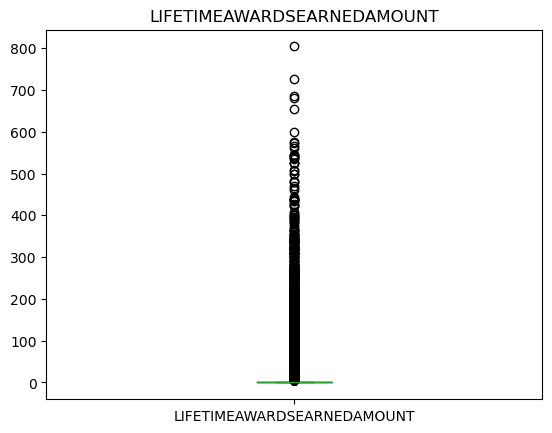

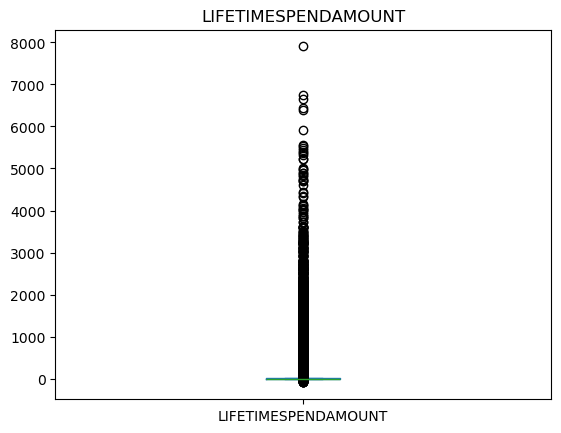

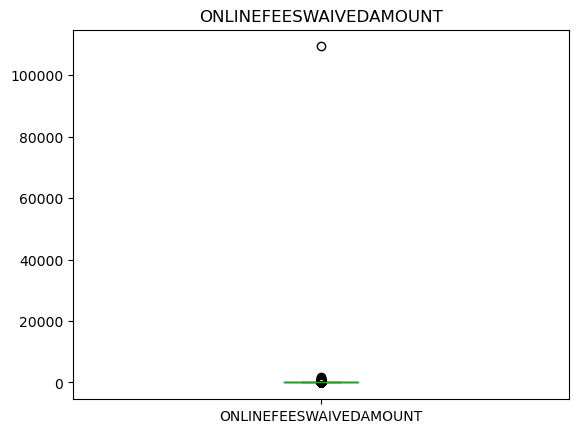

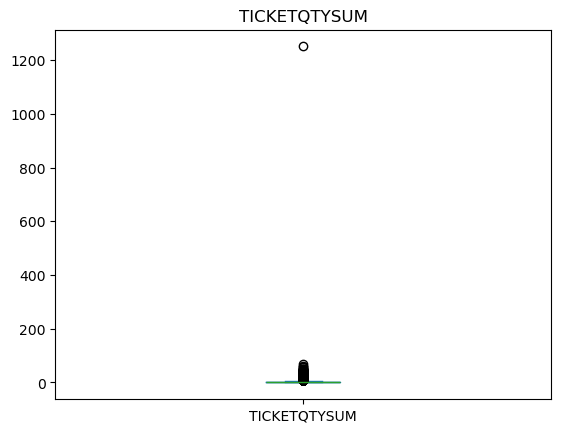

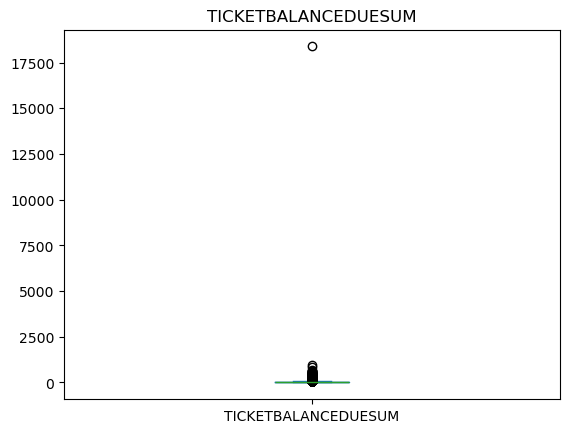

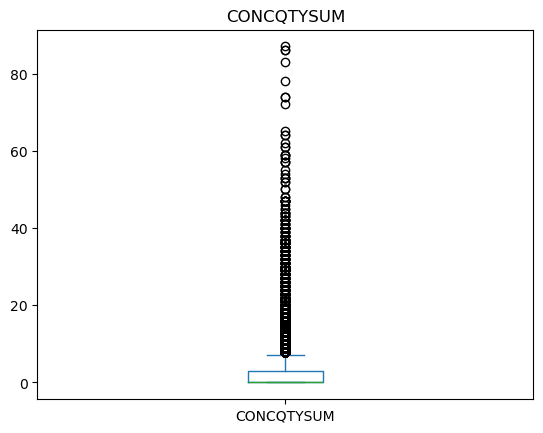

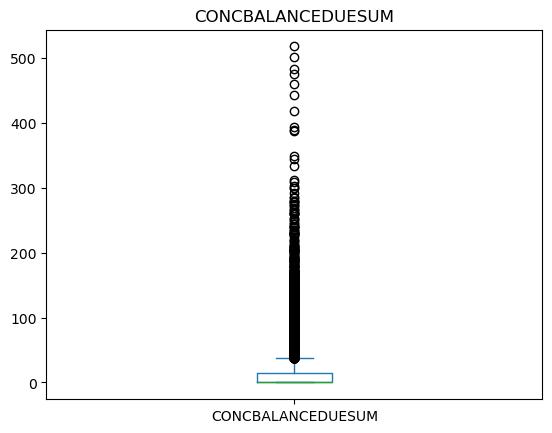

In [22]:
# To find (Numerical) Inconsistent values

for col in ['LIFETIMEAWARDSEARNEDAMOUNT','LIFETIMESPENDAMOUNT','ONLINEFEESWAIVEDAMOUNT','TICKETQTYSUM','TICKETBALANCEDUESUM','CONCQTYSUM','CONCBALANCEDUESUM']:
    plt.figure()
    data[col].plot(kind='box')
    plt.title(col)
    plt.show()


### Inaccurate values are the following columns
ISPREMIER, LOYALTYEMAILOFFEROPTININDICATOR  

### Inconsistence can be seen from the box plot and summary statistic
'LIFETIMEAWARDSEARNEDAMOUNT','LIFETIMESPENDAMOUNT','ONLINEFEESWAIVEDAMOUNT','TICKETQTYSUM','TICKETBALANCEDUESUM','CONCQTYSUM','CONCBALANCEDUESUM'

## 2. Part II: Data cleaning & transforming

### A -  Rename the variable names

In [27]:
data=data.rename(columns={'AGE21PLUSINDICATOR': 'AGE21PLUS', 'AGE18TO21INDICATOR': 'AGE18TO21','AGE13TO18INDICATOR': 'AGE13TO18',
'LOYALTYEMAILOFFEROPTININDICATOR': 'LOYALTY_EMAIL_OFFER', 'REWARDSEMAILOPTININDICATOR': 'REWARD_EMAIL',
'REWARDSMOBILEOPTININDICATOR': 'REWARD_MOBILE', 'REWARDSSMSOPTININDICATOR': 'REWARD_SMS',
'THEATREMOBILEOFFEROPTININDICATOR': 'THEATR_MOB_OFFER', 'THEATRESMSOFFEROPTININDICATOR': 'THEATR_SMS_OFFER',
'LIFETIMEAWARDSEARNEDAMOUNT': 'LIFE_AWARD_AMT', 'LIFETIMESPENDAMOUNT': 'LIFE_SPEND_AMT',
'ONLINEFEESWAIVEDAMOUNT': 'OL_FEE_WAIVE_AMT', 'ESTIMATEDINCOMERANGE': 'EST_INC_RNG',
'ESTIMATEDHOMEMARKETVALUERANGE': 'EST_HOME_VAL_RNG', 'CHILDRENPRESENCE': 'CHILD_PRES',
'HASFREQUENTVISITTHEATRENUMBER': 'FREQ_THEATRE', 'TICKETQTYSUM': 'TICKET_QTY',
'TICKETBALANCEDUESUM': 'TICKET_BAL', 'CONCLOYDISCOUNTAMTSUM': 'CONCLOYDISC', 'CONCBALANCEDUESUM': 'CONC_BAL'})
data.head(2)

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,BIRTHDATE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL
0,1,0,0,0,0,1/26/2016,1,1,0,0,0.00,0,0.00,0.00,0.00,8,19,0,0,2,29.58,0,0.00,0.00
1,1,0,0,1,3,1/1/2001,1,1,1,0,1.00,0,5.00,-63.04,0.00,8,19,3,1,20,191.90,0,0.00,0.00


### B - Print the column names and the number of unique values in each column. Based on the number of unique values, what variables appear to be categorical? What variables appear to be numerical?

In [30]:
# Print column names
data.columns

Index(['ISPREMIER', 'AGE21PLUS', 'AGE18TO21', 'AGE13TO18', 'GENDERCODE',
       'BIRTHDATE', 'LOYALTY_EMAIL_OFFER', 'REWARD_EMAIL', 'REWARD_MOBILE',
       'REWARD_SMS', 'THEATR_MOB_OFFER', 'THEATR_SMS_OFFER', 'LIFE_AWARD_AMT',
       'LIFE_SPEND_AMT', 'OL_FEE_WAIVE_AMT', 'EST_INC_RNG', 'EST_HOME_VAL_RNG',
       'CHILD_PRES', 'FREQ_THEATRE', 'TICKET_QTY', 'TICKET_BAL', 'CONCQTYSUM',
       'CONCLOYDISC', 'CONC_BAL'],
      dtype='object')

In [32]:
# Number of unique value from each columns
data.nunique()

ISPREMIER                  3
AGE21PLUS                  2
AGE18TO21                  2
AGE13TO18                  2
GENDERCODE                 3
BIRTHDATE              18096
LOYALTY_EMAIL_OFFER        3
REWARD_EMAIL               2
REWARD_MOBILE              2
REWARD_SMS                 2
THEATR_MOB_OFFER           2
THEATR_SMS_OFFER           2
LIFE_AWARD_AMT           255
LIFE_SPEND_AMT          5038
OL_FEE_WAIVE_AMT         275
EST_INC_RNG               10
EST_HOME_VAL_RNG          20
CHILD_PRES                 3
FREQ_THEATRE               2
TICKET_QTY                56
TICKET_BAL              6965
CONCQTYSUM                67
CONCLOYDISC              153
CONC_BAL                5987
dtype: int64

### Following columns are the categorical values even though it is numerical

- ISPREMIER 
- AGE21PLUS
- AGE18TO21 
- AGE13TO18 
- GENDERCODE 
- LOYALTY_EMAIL_OFFER
- REWARD_EMAIL
- REWARD_MOBILE
- REWARD_SMS
- THEATR_MOB_OFFER
- THEATR_SMS_OFFER
- CHILD_PRES
- FREQ_THEATRE 

### Other than above columns following are the numerical

- LIFE_AWARD_AMT
- LIFE_SPEND_AMT
- OL_FEE_WAIVE_AMT
- EST_INC_RNG
- EST_HOME_VAL_RNG
- TICKET_QTY
- TICKET_BAL
- CONCQTYSUM
- CONCLOYDISC
- CONC_BAL

- BIRTHDATE only column is object

### C - Report data types.

In [36]:
data.dtypes

ISPREMIER                int64
AGE21PLUS                int64
AGE18TO21                int64
AGE13TO18                int64
GENDERCODE               int64
BIRTHDATE               object
LOYALTY_EMAIL_OFFER      int64
REWARD_EMAIL             int64
REWARD_MOBILE            int64
REWARD_SMS               int64
THEATR_MOB_OFFER       float64
THEATR_SMS_OFFER         int64
LIFE_AWARD_AMT         float64
LIFE_SPEND_AMT         float64
OL_FEE_WAIVE_AMT       float64
EST_INC_RNG              int64
EST_HOME_VAL_RNG         int64
CHILD_PRES               int64
FREQ_THEATRE             int64
TICKET_QTY               int64
TICKET_BAL             float64
CONCQTYSUM               int64
CONCLOYDISC            float64
CONC_BAL               float64
dtype: object

### D - Find basic statistics.

In [39]:
data.describe()

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL
count,"47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,166.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00"
mean,0.12,0.89,0.06,0.04,2.46,0.82,0.86,0.50,0.00,0.51,0.00,4.88,51.87,4.39,1.05,2.11,2.68,0.34,2.31,23.31,1.97,-0.20,11.33
std,0.32,0.31,0.24,0.19,1.08,0.39,0.35,0.50,0.01,0.50,0.01,30.81,293.99,504.10,2.47,4.64,0.81,0.47,6.90,93.36,4.26,1.02,23.85
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-91.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-17.68,0.00
25%,0.00,1.00,0.00,0.00,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,1.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,2.94,0.00,0.00,0.00,3.00,0.00,1.00,7.98,0.00,0.00,0.00
75%,0.00,1.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,9.20,0.00,0.00,0.00,3.00,1.00,3.00,30.78,3.00,0.00,15.19
max,2.00,1.00,1.00,1.00,3.00,5.00,1.00,1.00,1.00,1.00,1.00,804.00,"7,902.85","109,350.00",9.00,19.00,3.00,1.00,"1,251.00","18,382.52",87.00,0.00,517.18


### E - Change data types, if necessary.

In [42]:
# Converting object to datetime
data['BIRTHDATE'] = pd.to_datetime(data['BIRTHDATE'])

- Converted 'BIRTHDATE' str value to a datetime to perform time-series operations.  
- Not converting Categorical to dummy variables. It will make data more complex.

### F - When it comes to income and home values, many people do not like to share their income and home value. This is clearly the case in this dataset. Creating two new variables and use them for business intelligence and machine learning. They seem to be useful.
i. UNK_INC: 1 for unknown income, 0 for otherwise
ii. UNK_HOME: 1 for unknown home value, 0 for otherwise.

In [46]:
# Creating new column UNK_INC
data['UNK_INC'] = data['EST_INC_RNG'].apply(lambda x: 1 if x <= 1 else 0)
data.head()

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,BIRTHDATE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC
0,1,0,0,0,0,2016-01-26,1,1,0,0,0.00,0,0.00,0.00,0.00,8,19,0,0,2,29.58,0,0.00,0.00,0
1,1,0,0,1,3,2001-01-01,1,1,1,0,1.00,0,5.00,-63.04,0.00,8,19,3,1,20,191.90,0,0.00,0.00,0
2,1,1,0,0,0,1953-11-02,1,1,0,0,0.00,0,0.00,34.00,10.00,8,19,1,0,16,192.84,1,-8.49,0.00,0
3,0,1,0,0,0,1962-05-18,0,0,0,0,0.00,0,0.00,0.00,0.00,8,19,1,0,0,0.00,1,0.00,0.00,0
4,1,1,0,0,0,1965-10-02,0,0,0,0,0.00,0,0.00,12.08,5.00,8,19,3,1,10,101.20,0,0.00,0.00,0


In [48]:
# Creating new column UNK_HOME
data['UNK_HOME'] = data['EST_HOME_VAL_RNG'].apply(lambda x: 1 if x <= 1 else 0)
data.head()

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,BIRTHDATE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME
0,1,0,0,0,0,2016-01-26,1,1,0,0,0.00,0,0.00,0.00,0.00,8,19,0,0,2,29.58,0,0.00,0.00,0,0
1,1,0,0,1,3,2001-01-01,1,1,1,0,1.00,0,5.00,-63.04,0.00,8,19,3,1,20,191.90,0,0.00,0.00,0,0
2,1,1,0,0,0,1953-11-02,1,1,0,0,0.00,0,0.00,34.00,10.00,8,19,1,0,16,192.84,1,-8.49,0.00,0,0
3,0,1,0,0,0,1962-05-18,0,0,0,0,0.00,0,0.00,0.00,0.00,8,19,1,0,0,0.00,1,0.00,0.00,0,0
4,1,1,0,0,0,1965-10-02,0,0,0,0,0.00,0,0.00,12.08,5.00,8,19,3,1,10,101.20,0,0.00,0.00,0,0


### G - Create a new column AGE from BIRTHDATE and then remove BIRTHDATE. For example, a person who is born 1/01/2001 would be about 22 years old (2023 – 2001).

In [51]:
# Creating AGE column
data["AGE"] = data["BIRTHDATE"].apply(lambda x: datetime.now().year - x.year)
data.head()

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,BIRTHDATE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE
0,1,0,0,0,0,2016-01-26,1,1,0,0,0.00,0,0.00,0.00,0.00,8,19,0,0,2,29.58,0,0.00,0.00,0,0,9
1,1,0,0,1,3,2001-01-01,1,1,1,0,1.00,0,5.00,-63.04,0.00,8,19,3,1,20,191.90,0,0.00,0.00,0,0,24
2,1,1,0,0,0,1953-11-02,1,1,0,0,0.00,0,0.00,34.00,10.00,8,19,1,0,16,192.84,1,-8.49,0.00,0,0,72
3,0,1,0,0,0,1962-05-18,0,0,0,0,0.00,0,0.00,0.00,0.00,8,19,1,0,0,0.00,1,0.00,0.00,0,0,63
4,1,1,0,0,0,1965-10-02,0,0,0,0,0.00,0,0.00,12.08,5.00,8,19,3,1,10,101.20,0,0.00,0.00,0,0,60


In [53]:
# Removing birthdate column
data = data.drop(['BIRTHDATE'], axis=1)
data.head(2)

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE
0,1,0,0,0,0,1,1,0,0,0.00,0,0.00,0.00,0.00,8,19,0,0,2,29.58,0,0.00,0.00,0,0,9
1,1,0,0,1,3,1,1,1,0,1.00,0,5.00,-63.04,0.00,8,19,3,1,20,191.90,0,0.00,0.00,0,0,24


### H - Discuss any other data quality issues present in the dataset.

In [56]:
# To find Inconsistent values
for col in data.columns:
    if data[col].nunique() < 60:
        print(col, data[col].unique())

ISPREMIER [1 0 2]
AGE21PLUS [0 1]
AGE18TO21 [0 1]
AGE13TO18 [0 1]
GENDERCODE [0 3 1]
LOYALTY_EMAIL_OFFER [1 0 5]
REWARD_EMAIL [1 0]
REWARD_MOBILE [0 1]
REWARD_SMS [0 1]
THEATR_MOB_OFFER [0.00 1.00 nan]
THEATR_SMS_OFFER [0 1]
EST_INC_RNG [8 2 3 4 5 6 7 9 1 0]
EST_HOME_VAL_RNG [19  5  1  6  7  8  9 10 11  2 12 13 14 15 16 17  3 18  4  0]
CHILD_PRES [0 3 1]
FREQ_THEATRE [0 1]
TICKET_QTY [   2   20   16    0   10    1    4    3    5   11    8   14   12   18
    6   19    7    9   22   17   25   15   32   13   35   24   21   28
   33   23   27   47   42   26   30   48   29   39   46   34   37   38
   44   40   41   31   36   63   56 1251   57   45   52   68   49   51]
UNK_INC [0 1]
UNK_HOME [0 1]


In [58]:
#check for any data quality issues in the 'ISPREMIER' column. 
data.groupby(['ISPREMIER']).size()

ISPREMIER
0    41724
1     5442
2        3
dtype: int64

In [60]:
#check for any data quality issues in the 'LOYALTY_EMAIL_OFFER' column. 
data.groupby(['LOYALTY_EMAIL_OFFER']).size()

LOYALTY_EMAIL_OFFER
0     8643
1    38524
5        2
dtype: int64

In [62]:
#check for any data quality issues in the 'THEATR_MOB_OFFER' column. 
data['THEATR_MOB_OFFER'].unique()

array([0.00, 1.00, nan])

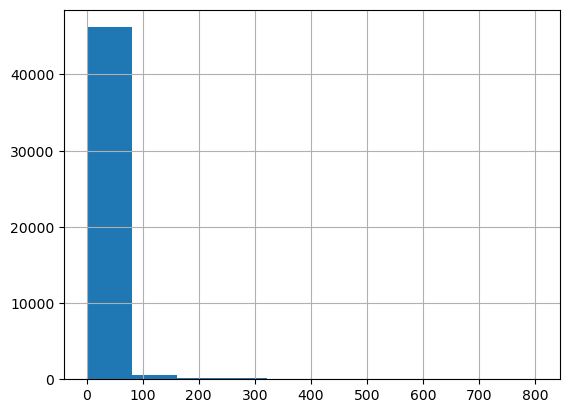

In [64]:
#check for any data quality issues in the 'LIFE_AWARD_AMT' column. 
data['LIFE_AWARD_AMT'].hist()
plt.show()

In [66]:
# See any data quality issue in CONCLOYDISC
data[data['CONCLOYDISC']>0]

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE


- I used for loop to find unique value in any columns and found issue in ISPREMIER & LOYALTY_EMAIL_OFFER. and missing value in THEATR_MOB_OFFER. Which i'll be addressing in next step.

### I - Address inconsistencies.

In [70]:
#Find incosistent value for OL_FEE_WAIVE_AMT

data[data['OL_FEE_WAIVE_AMT']>2000]

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE
12661,1,0,1,0,3,1,1,1,0,1.00,0,150.00,"1,571.54","109,350.00",0,0,3,1,1251,"18,382.52",22,0.00,126.64,1,1,28


In [72]:
# Dropping row number 12661 the amount seems incorrect
data.drop(labels=None, axis=0, index=12661, columns=None, level=None, inplace=True, errors='ignore')


In [74]:
# Checking if the row is drop 
data[data['OL_FEE_WAIVE_AMT']>2000]

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE


In [76]:
# Find incosistent value for Ticket_QTY

data[data['TICKET_QTY']>70]


,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE


- There were inconsistent value in many columns such as OL_FEE_WAIVE_AMT, TICKET_QTY,TICKET_BAL. From statistical analysis and graph display I found some larger number in that columns, Which I was going to address one by one then I found out that all 3 data inconsistency are in the same row. So I used drop code to remove entire row from the data. 

### J - Address inaccuracies. 

In [80]:
#converting inaccurate value to most popular value 
data= data.replace({'ISPREMIER':2}, {'ISPREMIER':0})

# Checking the changes

data['ISPREMIER'].unique()

array([1, 0], dtype=int64)

In [82]:
#converting inaccurate value to most popular value
data= data.replace({'LOYALTY_EMAIL_OFFER':5}, {'LOYALTY_EMAIL_OFFER':1})

#Checking the changes
data['LOYALTY_EMAIL_OFFER'].unique()

array([1, 0], dtype=int64)

- There are inaccurtae values in 'ISPREMIER','LOYALTY_EMAIL_OFFER'. I changed it with the most popular value using replace method as the 'mode'method was not working for some reason. So from above checked data quality issues it can be seen which is the most popular value in those columns. 

### K - Address missing values. 

In [86]:
# fill missing value with the mean value in THEATR_MOB_OFFER column

data['THEATR_MOB_OFFER'].fillna(data['THEATR_MOB_OFFER'].mode()[0],inplace=True)

# Re-chechking missing value
data.isnull().sum()


ISPREMIER              0
AGE21PLUS              0
AGE18TO21              0
AGE13TO18              0
GENDERCODE             0
LOYALTY_EMAIL_OFFER    0
REWARD_EMAIL           0
REWARD_MOBILE          0
REWARD_SMS             0
THEATR_MOB_OFFER       0
THEATR_SMS_OFFER       0
LIFE_AWARD_AMT         0
LIFE_SPEND_AMT         0
OL_FEE_WAIVE_AMT       0
EST_INC_RNG            0
EST_HOME_VAL_RNG       0
CHILD_PRES             0
FREQ_THEATRE           0
TICKET_QTY             0
TICKET_BAL             0
CONCQTYSUM             0
CONCLOYDISC            0
CONC_BAL               0
UNK_INC                0
UNK_HOME               0
AGE                    0
dtype: int64

- Instead of droping missing value I filled missing value with mode value.
- Now there is no missing values. 

## 3. Part III: Business Intelligence (BI) - Data visualization & Exploratory data analysis (e.g., correlation)

### A - The analysis should be more focused on answering the problem statement: 
- Who are the customers that are likely to convert to Premier? 
- Who are the customers that utilize Premier? 
- Who are the customers that utilize Insider?

In [91]:
# To see the data befrore BI
data.head(2)

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE
0,1,0,0,0,0,1,1,0,0,0.00,0,0.00,0.00,0.00,8,19,0,0,2,29.58,0,0.00,0.00,0,0,9
1,1,0,0,1,3,1,1,1,0,1.00,0,5.00,-63.04,0.00,8,19,3,1,20,191.90,0,0.00,0.00,0,0,24


In [93]:
# Find out the count of people who has premier
data['ISPREMIER'].value_counts() # 0 is insider & 1 is Premier

ISPREMIER
0    41727
1     5441
Name: count, dtype: int64

### B- Here is list of business intelligence analyses.

- Pivot table grouped by ISPREMIER 
- Pivot table grouped by 'ISPREMIER','UNK_HOME' 
- Visualization of ISPREMIER with variables like AGE. 
- Visualizing Online Fees Waived Amount vs. Estimated Income Range 
- Visualizing Average Lifetime Awards Amount vs. Estimated Income Range 
- Visualizing % Membership By Loyalty Email Offer Opt-In 
- Visualizing % Membership By Reward Email Opt-In 
- Visualizing % Membership By Reward Mobile Opt-In 
- Visualizing % Membership By other variables such as Reward SMS Opt-In, GENDER, Estimate Income Range, … 
- Visualize ISPREMIER, Concession Loyalty Discount vs. Concession Balance 
- Visualize ISPREMIER, Ticket Balance vs. Ticket Quantity

### ISPREMIER

In [98]:
# Pivot table grouped by ISPREMIER
P = data.groupby('ISPREMIER').size()
P

ISPREMIER
0    41727
1     5441
dtype: int64

In [100]:
# Transpose the pivot table for pie plot
P.T

ISPREMIER
0    41727
1     5441
dtype: int64

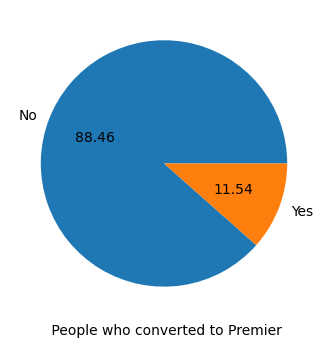

In [102]:
# Convert rate of premier

P.T.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));
plt.xlabel(" People who converted to Premier");
plt.show()

### ISPREMIER & UNK_HOME

In [105]:
# Grouped by 'ISPREMIER','UNK_HOME'
UH = data.groupby(['ISPREMIER','UNK_HOME']).size().unstack()
UH

UNK_HOME,0,1
ISPREMIER,,
0,7993,33734
1,1983,3458


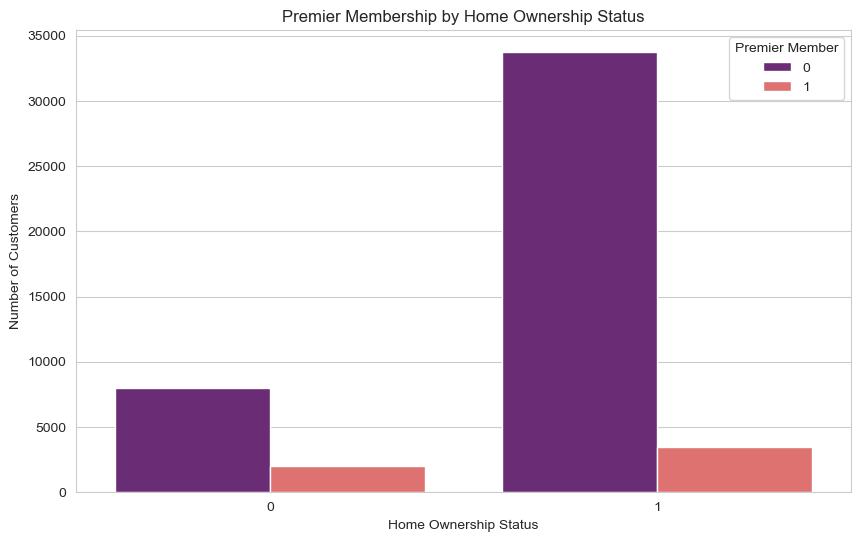

In [107]:
# Bar graph for Unk_home who has and hasn't premier

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=data, x='UNK_HOME', hue='ISPREMIER', palette='magma')

plt.title('Premier Membership by Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Number of Customers')
plt.legend(title='Premier Member')
plt.show()

- Unknow home market value has more Insider members. 

### AGE

In [111]:
# Creating new dataframe for distributions
PRE = data[data['ISPREMIER'] == 1]  # those have premier    
NOTPRE = data[data['ISPREMIER'] == 0]  # those NOT have premier
print(len(PRE), len(NOTPRE))

5441 41727


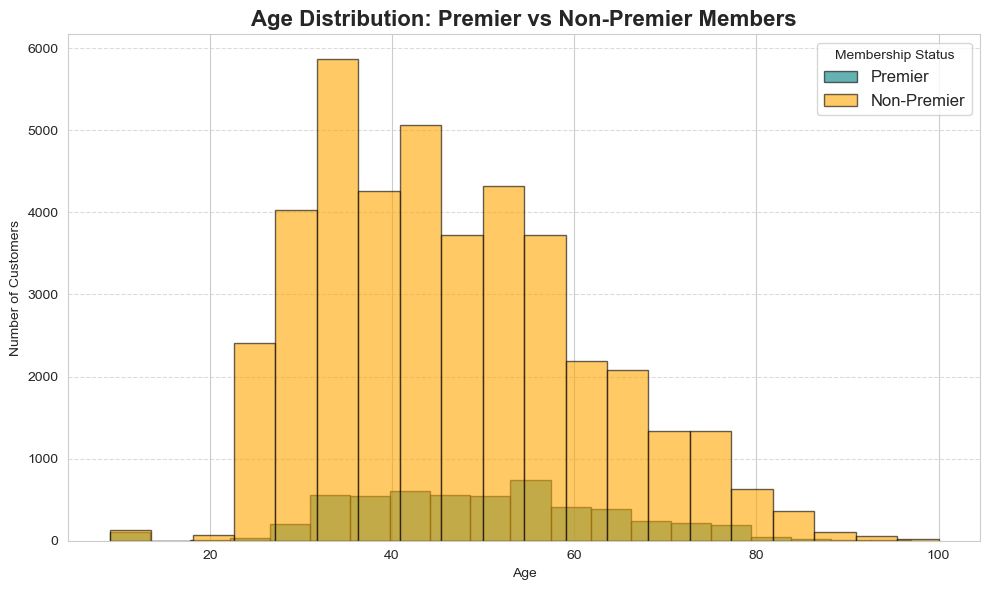

In [113]:
plt.figure(figsize=(10,6))

# Plot histograms with better 
plt.hist(PRE['AGE'], bins=20, alpha=0.6, label='Premier', color='teal', edgecolor='black')
plt.hist(NOTPRE['AGE'], bins=20, alpha=0.6, label='Non-Premier', color='orange', edgecolor='black')

# Titles and Labels
plt.title('Age Distribution: Premier vs Non-Premier Members', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend(title='Membership Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add minor ticks
plt.minorticks_on()

# Tight layout
plt.tight_layout()
plt.show()

- People with the age of between 35 to 60 are more likley to convert their membership to premier.
- Between age of 23 to 30 group of people are having INSIDER membership and it is slowly droping down.  

### ISPREMIER & FREQ_THEATRE

In [117]:
# Grouped by ISPREMIER with FREQ_THEATRE 
FREQ = data.groupby(['ISPREMIER','FREQ_THEATRE']).size().unstack()
FREQ

FREQ_THEATRE,0,1
ISPREMIER,,
0,26710,15017
1,4259,1182


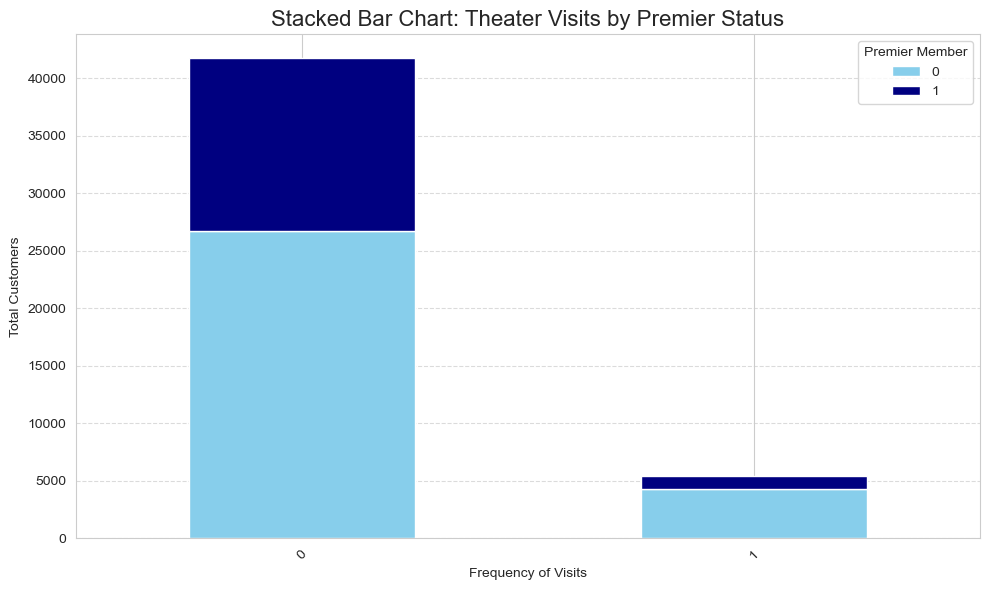

In [119]:
# Bar graph
FREQ.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'navy'])

plt.title('Stacked Bar Chart: Theater Visits by Premier Status', fontsize=16)
plt.xlabel('Frequency of Visits')
plt.ylabel('Total Customers')
plt.legend(title='Premier Member')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Premier membership people are not using theater frequently.
- INSIDER visit more frequent than ISPREMIER members. 

### ISPREMIER & UNK_INC

In [123]:
# Grouped by 'ISPREMIER','UNK_INC'
UI = data.groupby(['ISPREMIER','UNK_INC']).size().unstack()

UI

UNK_INC,0,1
ISPREMIER,,
0,6093,35634
1,1630,3811


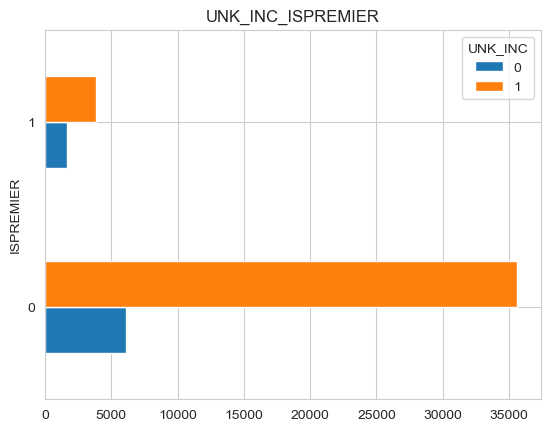

In [125]:
# Bar graph for UNK_INC_ISPREMIER
UI.plot(kind='barh', title= 'UNK_INC_ISPREMIER') 
plt.show()

- In ISPREMIER membership unknow Inc people owns membership than people who mention thier income range.
- Same with the INSIDER membership, there are more unknow INC people than the know INC people.

### Online Fees Waived Amount vs. Estimated Income Range

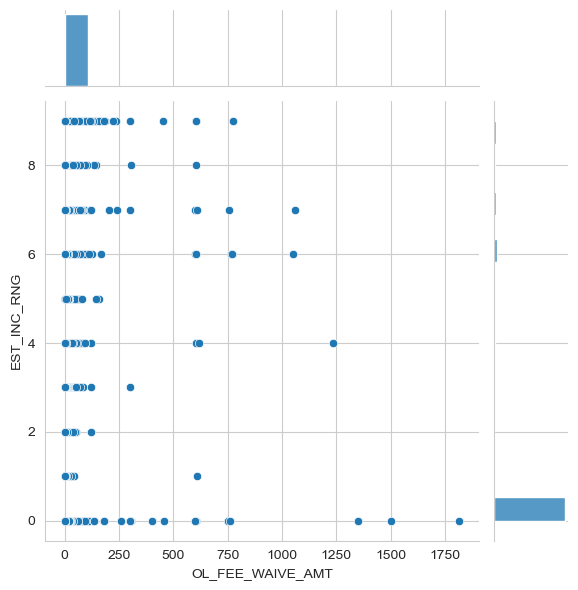

In [129]:
# Visualizing Online Fees Waived Amount vs. Estimated Income Range

sns.jointplot(data=data, x='OL_FEE_WAIVE_AMT',y='EST_INC_RNG');
plt.show()

In [131]:
# to see corr relation between OL_FEE_WAIVE_AMT,EST_INC_RNG
data[['OL_FEE_WAIVE_AMT','EST_INC_RNG']].corr()

,OL_FEE_WAIVE_AMT,EST_INC_RNG
OL_FEE_WAIVE_AMT,1.00,0.07
EST_INC_RNG,0.07,1.00


- Unknow INC range people Waived thier Online Fees Amount more than other INC range of people. Lowest Waived Online Fees Amount is the people with INC range 1,2,& 3. 
- With the INC range of 7,8,& 9  people aslo waived thier online fees amount.

### Average Lifetime Awards Amount vs. Estimated Income Range

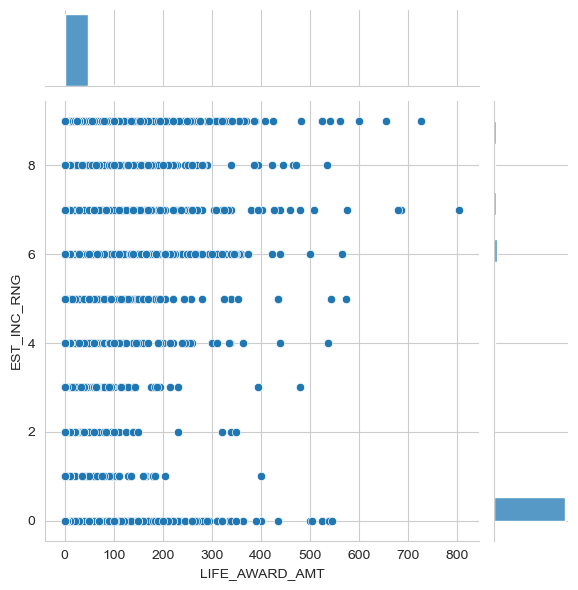

In [135]:
# Visualizing Average Lifetime Awards Amount vs. Estimated Income Range
sns.jointplot(data=data, x='LIFE_AWARD_AMT',y='EST_INC_RNG');
plt.show()

In [137]:
# to see corr relation between OL_FEE_WAIVE_AMT,EST_INC_RNG
data[['LIFE_AWARD_AMT','EST_INC_RNG']].corr()

,LIFE_AWARD_AMT,EST_INC_RNG
LIFE_AWARD_AMT,1.00,0.26
EST_INC_RNG,0.26,1.00


### Membership By Loyalty Email Offer

In [140]:
# Visualizing % Membership By Loyalty Email Offer Opt-In
LOYALEMAIL = data.groupby(['LOYALTY_EMAIL_OFFER','ISPREMIER']).size().unstack()
LOYALEMAIL

ISPREMIER,0,1
LOYALTY_EMAIL_OFFER,,
0,7749,894
1,33978,4547


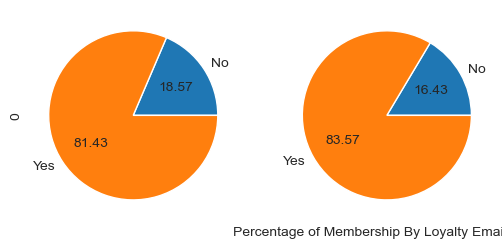

In [142]:
# Pie chart for % Membership By Loyalty Email Offer
LOYALEMAIL.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(6, 6), legend=False, subplots=True);

plt.xlabel("Percentage of Membership By Loyalty Email Offer")
plt.ylabel("")
plt.show()

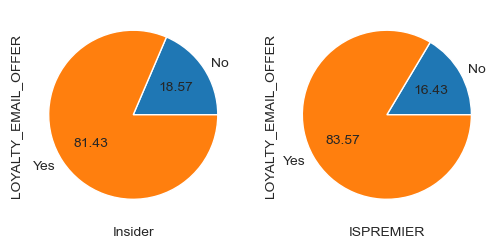

In [144]:
# Labeling charts
axes = LOYALEMAIL.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(6, 6), legend=False, subplots=True);

axes[0].set_xlabel("Insider")
axes[1].set_xlabel("ISPREMIER")
axes[0].set_ylabel("LOYALTY_EMAIL_OFFER")
axes[1].set_ylabel("LOYALTY_EMAIL_OFFER")
plt.show()


### Membership By Reward Email

In [147]:
#Visualizing % Membership By Reward Email Opt-In
REWARDEMAIL = data.groupby(['REWARD_EMAIL','ISPREMIER']).size().unstack()
REWARDEMAIL

ISPREMIER,0,1
REWARD_EMAIL,,
0,5969,678
1,35758,4763


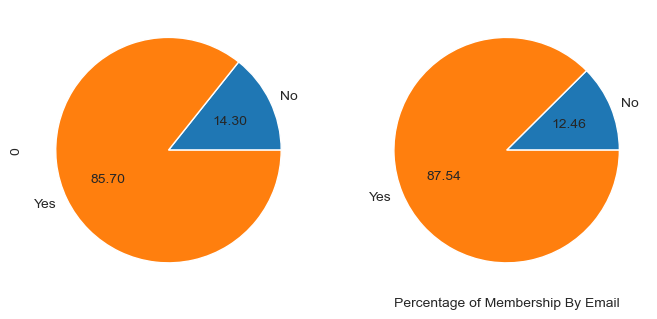

In [149]:
# Pie chart for % Membership By Reward Email
REWARDEMAIL.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(8, 6), legend=False, subplots=True);

plt.xlabel("Percentage of Membership By Email")
plt.ylabel("")
plt.show()

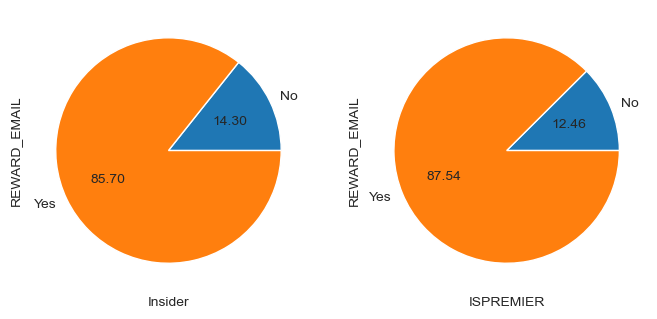

In [151]:
# Labeling charts
axes = REWARDEMAIL.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(8, 6), legend=False, subplots=True);

axes[0].set_xlabel("Insider")
axes[1].set_xlabel("ISPREMIER")
axes[0].set_ylabel("REWARD_EMAIL")
axes[1].set_ylabel("REWARD_EMAIL")
plt.show()


### Membership By Reward Mobile Opt-In

In [154]:
# Visualizing % Membership By Reward Mobile Opt-In
REWARDMOBILE = data.groupby(['REWARD_MOBILE','ISPREMIER']).size().unstack()
REWARDMOBILE

ISPREMIER,0,1
REWARD_MOBILE,,
0,21461,1979
1,20266,3462


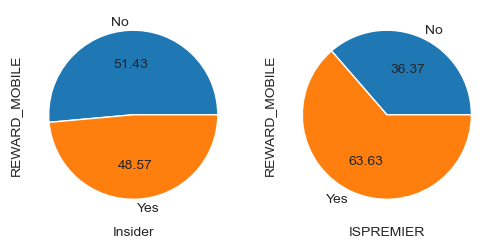

In [156]:
# Pie chart for % Membership By Reward Mobile

axes = REWARDMOBILE.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(6, 6), legend=False, subplots=True);

axes[0].set_xlabel("Insider")
axes[1].set_xlabel("ISPREMIER")
axes[0].set_ylabel("REWARD_MOBILE")
axes[1].set_ylabel("REWARD_MOBILE")
plt.show()

### Membership By other variables such as Reward SMS Opt-In, GENDER, Estimate Income Range,

#### Reward SMS Opt-In

In [160]:
# Visualizing % Membership By Reward SMS Opt-In
REWARDSMS = data.groupby(['REWARD_SMS','ISPREMIER']).size().unstack()
REWARDSMS

ISPREMIER,0,1
REWARD_SMS,,
0,"41,725.00","5,441.00"
1,2.00,NaN


In [162]:
# Just to make sure that there are any na values in rewards sms
data['REWARD_SMS'].unique()

array([0, 1], dtype=int64)

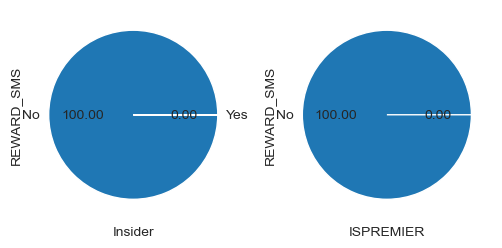

In [164]:
# Labeling charts
axes = REWARDSMS.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(6, 6), legend=False, subplots=True);

axes[0].set_xlabel("Insider")
axes[1].set_xlabel("ISPREMIER")
axes[0].set_ylabel("REWARD_SMS")
axes[1].set_ylabel("REWARD_SMS")
plt.show()

#### GENDER CODE

In [167]:
# Visualizing % Membership By GENDERCODE

GENDERCODE = data.groupby(['GENDERCODE','ISPREMIER']).size().unstack()
GENDERCODE

ISPREMIER,0,1
GENDERCODE,,
0,4469,1543
1,2435,1264
3,34823,2634


In [169]:
# Percentage of Gender code
GENDERCODE =GENDERCODE.div(GENDERCODE.sum(axis=1), axis=0)
GENDERCODE

ISPREMIER,0,1
GENDERCODE,,
0,0.74,0.26
1,0.66,0.34
3,0.93,0.07


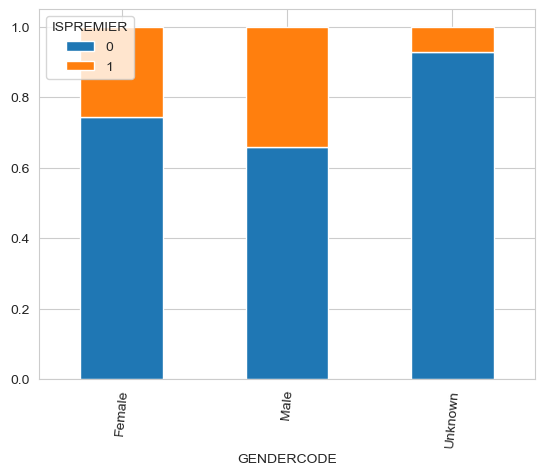

In [171]:
# Bar graph for Gender code
ax= GENDERCODE.plot.bar(stacked=True,rot=85);
ax.set_xticklabels(['Female','Male','Unknown'])
plt.show()

#### Estimate Income Range

In [174]:
# Visualizing % Membership By Estimated income range
ESTINCRNG = data.groupby(['ISPREMIER', 'EST_INC_RNG']).size().unstack()
ESTINCRNG

EST_INC_RNG,0,1,2,3,4,5,6,7,8,9
ISPREMIER,,,,,,,,,,
0,35384,250,178,358,529,639,1686,1077,503,1123
1,3773,38,47,77,133,170,404,296,166,337


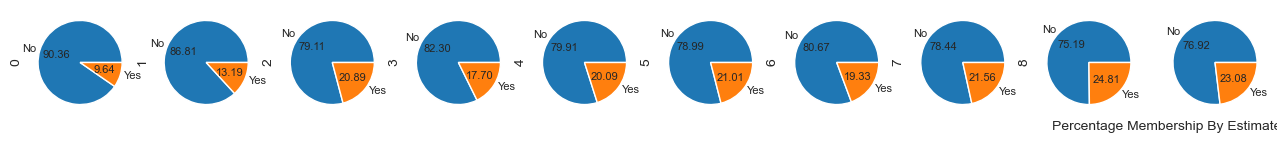

In [176]:
# Pie chart for % Membership By Estimated income range

ESTINCRNG.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=8, figsize=(16,14 ), legend=False, subplots=True);

plt.xlabel("Percentage Membership By Estimated income range")
plt.ylabel("")
plt.show()

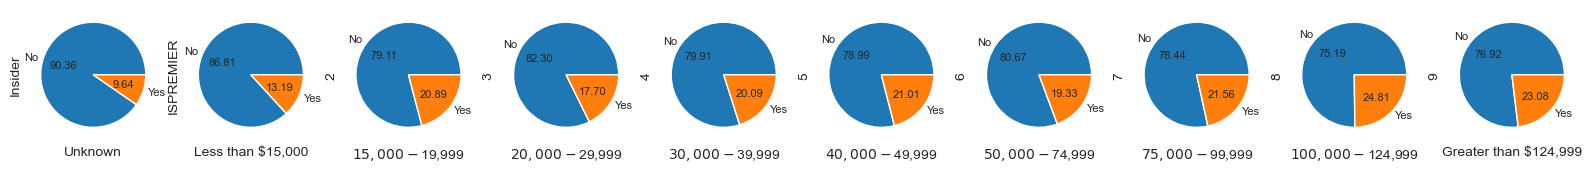

In [178]:
# Labeling charts
axes= ESTINCRNG.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=8, figsize=(20, 18), legend=False, subplots=True);

axes[0].set_xlabel("Unknown")
axes[1].set_xlabel("Less than $15,000")
axes[2].set_xlabel("$15,000-$19,999")
axes[3].set_xlabel("$20,000-$29,999")
axes[4].set_xlabel("$30,000-$39,999")
axes[5].set_xlabel("$40,000-$49,999")
axes[6].set_xlabel("$50,000-$74,999")
axes[7].set_xlabel("$75,000-$99,999")
axes[8].set_xlabel("$100,000-$124,999")
axes[9].set_xlabel("Greater than $124,999")
axes[0].set_ylabel("Insider")
axes[1].set_ylabel("ISPREMIER")
plt.show()

#### CHILD PRESENT

In [181]:
# Membership by CHILD PRESENT
CHILDPRES = data.groupby(['CHILD_PRES','ISPREMIER']).size().unstack()
CHILDPRES

ISPREMIER,0,1
CHILD_PRES,,
0,1473,388
1,3817,960
3,36437,4093


In [183]:
# Percentage of CHILD PRESENT
CHILDPRES= CHILDPRES.div(CHILDPRES.sum(axis=1), axis=0)
CHILDPRES

ISPREMIER,0,1
CHILD_PRES,,
0,0.79,0.21
1,0.80,0.20
3,0.90,0.10


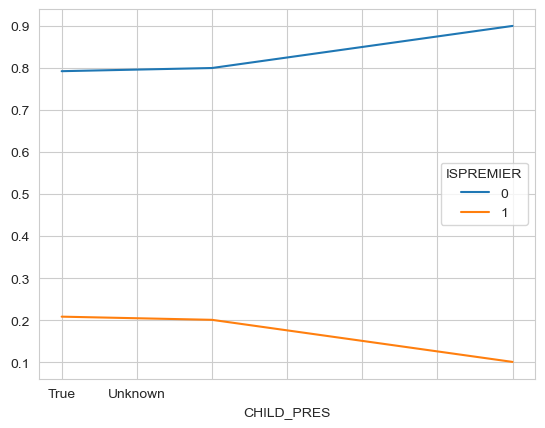

In [202]:
# Visualization of CHILD PRESENT
ax = CHILDPRES.plot();
ax.set_xticklabels(['False','True','Unknown'])
plt.show()

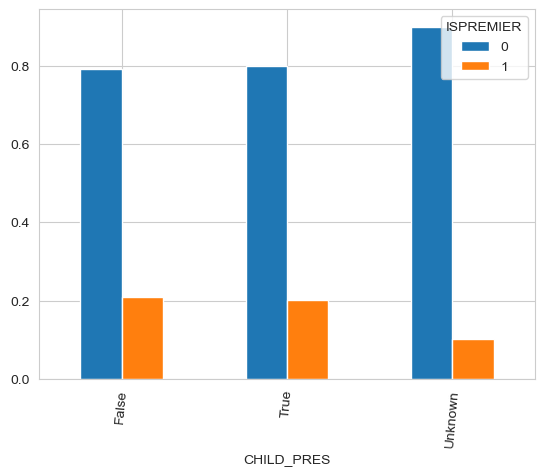

In [204]:
# Visualization of CHILD PRESENT with bar graph
ax = CHILDPRES.plot.bar(rot=85);
ax.set_xticklabels(['False','True','Unknown'])
plt.show()

In [189]:
# Membership by TICKET_QTY
TICKETQTY =data.groupby(['TICKET_QTY','ISPREMIER']).size().unstack()
TICKETQTY.head()

ISPREMIER,0,1
TICKET_QTY,,
0,"22,440.00",400.00
1,"2,075.00",99.00
2,"7,950.00",670.00
3,"2,468.00",373.00
4,"2,770.00",765.00


In [191]:
TICKETQTY = TICKETQTY.div(TICKETQTY.sum(axis=1),axis=0)
TICKETQTY.head()

ISPREMIER,0,1
TICKET_QTY,,
0,0.98,0.02
1,0.95,0.05
2,0.92,0.08
3,0.87,0.13
4,0.78,0.22


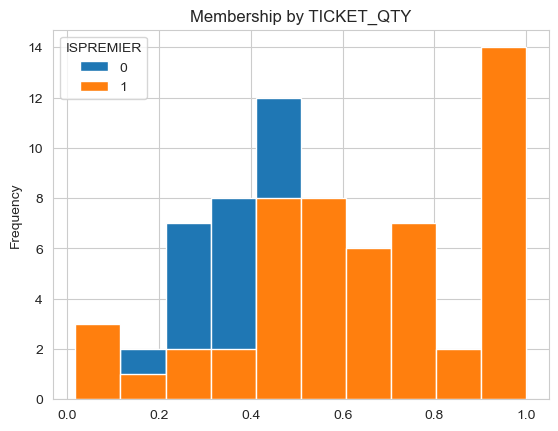

In [198]:
TICKETQTY.plot(kind='hist', title='Membership by TICKET_QTY')
plt.show()

#### Relation between LIFE_AWARD_AMT VS LIFE_SPEND_AMT 

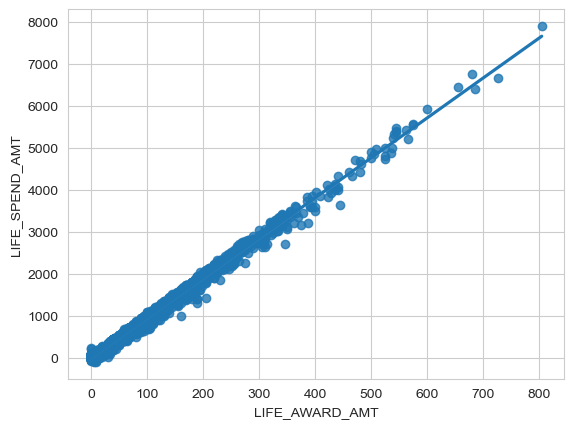

In [200]:
# reggresion plot 
sns.regplot(x='LIFE_AWARD_AMT' , y='LIFE_SPEND_AMT',data=data)
plt.show()

In [206]:
# Correlation between LIFE_AWARD_AMT,LIFE_SPEND_AMT
data[['LIFE_AWARD_AMT','LIFE_SPEND_AMT']].corr()

,LIFE_AWARD_AMT,LIFE_SPEND_AMT
LIFE_AWARD_AMT,1.00,1.00
LIFE_SPEND_AMT,1.00,1.00


- The correlation coefficient between LIFE_AWARD_AMT & LIFE_SPEND_AMT is very strong. 

###  ISPREMIER, Concession Loyalty Discount vs. Concession Balance

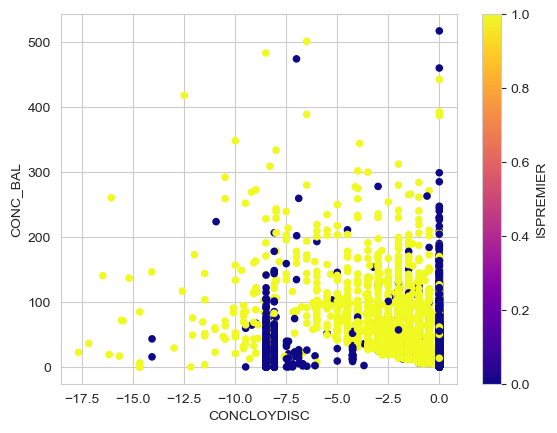

In [215]:
# Using scatter plot for relation between Concession Loyalty Discount vs. Concession Balance, by membership
data.plot.scatter(x="CONCLOYDISC", y="CONC_BAL", c="ISPREMIER",cmap="plasma" )
plt.show()

- ISPREMIER members who received Concession Loyalty Discount are more in the range of 0 to -5, meaning the amount they have received and on the sold Concession Balance to member is the range between 0 to 100 is more.

### ISPREMIER, Ticket Balance vs. Ticket Quantity

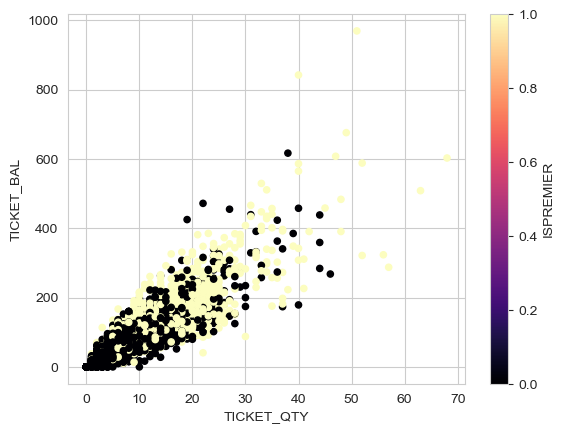

In [217]:
# Using scatter plot for relation between ISPREMIER, Ticket Balance vs. Ticket Quantity
data.plot.scatter(x="TICKET_QTY", y="TICKET_BAL", c="ISPREMIER", cmap="magma")
plt.show()

- Tickets sold to member are between 20 to 30 and the sold US dollar value of tickets are in the range of 150 to 350. 

### C - Correlation analysis

In [221]:
# Converting 'ISPREMIER' into dummy variable for better understanding of correlation
data_dummy= pd.get_dummies(data, columns=['ISPREMIER'])
data_dummy.head()

,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE,ISPREMIER_0,ISPREMIER_1
0,0,0,0,0,1,1,0,0,0.00,0,0.00,0.00,0.00,8,19,0,0,2,29.58,0,0.00,0.00,0,0,9,False,True
1,0,0,1,3,1,1,1,0,1.00,0,5.00,-63.04,0.00,8,19,3,1,20,191.90,0,0.00,0.00,0,0,24,False,True
2,1,0,0,0,1,1,0,0,0.00,0,0.00,34.00,10.00,8,19,1,0,16,192.84,1,-8.49,0.00,0,0,72,False,True
3,1,0,0,0,0,0,0,0,0.00,0,0.00,0.00,0.00,8,19,1,0,0,0.00,1,0.00,0.00,0,0,63,True,False
4,1,0,0,0,0,0,0,0,0.00,0,0.00,12.08,5.00,8,19,3,1,10,101.20,0,0.00,0.00,0,0,60,False,True


In [223]:
data_dummy.columns

Index(['AGE21PLUS', 'AGE18TO21', 'AGE13TO18', 'GENDERCODE',
       'LOYALTY_EMAIL_OFFER', 'REWARD_EMAIL', 'REWARD_MOBILE', 'REWARD_SMS',
       'THEATR_MOB_OFFER', 'THEATR_SMS_OFFER', 'LIFE_AWARD_AMT',
       'LIFE_SPEND_AMT', 'OL_FEE_WAIVE_AMT', 'EST_INC_RNG', 'EST_HOME_VAL_RNG',
       'CHILD_PRES', 'FREQ_THEATRE', 'TICKET_QTY', 'TICKET_BAL', 'CONCQTYSUM',
       'CONCLOYDISC', 'CONC_BAL', 'UNK_INC', 'UNK_HOME', 'AGE', 'ISPREMIER_0',
       'ISPREMIER_1'],
      dtype='object')

In [225]:
data.columns

Index(['ISPREMIER', 'AGE21PLUS', 'AGE18TO21', 'AGE13TO18', 'GENDERCODE',
       'LOYALTY_EMAIL_OFFER', 'REWARD_EMAIL', 'REWARD_MOBILE', 'REWARD_SMS',
       'THEATR_MOB_OFFER', 'THEATR_SMS_OFFER', 'LIFE_AWARD_AMT',
       'LIFE_SPEND_AMT', 'OL_FEE_WAIVE_AMT', 'EST_INC_RNG', 'EST_HOME_VAL_RNG',
       'CHILD_PRES', 'FREQ_THEATRE', 'TICKET_QTY', 'TICKET_BAL', 'CONCQTYSUM',
       'CONCLOYDISC', 'CONC_BAL', 'UNK_INC', 'UNK_HOME', 'AGE'],
      dtype='object')

In [227]:
# Correlation 
data_dummy.corr()

,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE,ISPREMIER_0,ISPREMIER_1
AGE21PLUS,1.00,-0.75,-0.58,-0.05,-0.02,-0.01,-0.02,-0.01,-0.02,-0.01,0.04,0.04,0.01,0.07,0.05,-0.05,0.04,0.07,0.06,0.05,-0.03,0.05,-0.07,-0.06,0.49,-0.06,0.06
AGE18TO21,-0.75,1.00,-0.05,0.03,-0.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.04,-0.04,-0.01,-0.05,-0.04,0.04,-0.01,-0.05,-0.04,-0.04,0.03,-0.05,0.05,0.04,-0.33,0.06,-0.06
AGE13TO18,-0.58,-0.05,1.00,0.04,0.03,0.02,0.03,-0.00,0.03,-0.00,-0.02,-0.03,-0.01,-0.05,-0.04,0.04,-0.04,-0.07,-0.06,-0.04,0.03,-0.04,0.06,0.05,-0.30,0.06,-0.06
GENDERCODE,-0.05,0.03,0.04,1.00,0.05,0.02,0.29,0.00,0.28,0.00,-0.02,-0.02,-0.03,-0.21,-0.24,0.20,0.04,-0.16,-0.16,-0.03,0.10,-0.03,0.23,0.28,-0.02,0.26,-0.26
LOYALTY_EMAIL_OFFER,-0.02,-0.00,0.03,0.05,1.00,0.79,0.42,0.00,0.42,0.00,-0.00,-0.00,-0.03,-0.06,-0.09,0.05,-0.04,-0.06,-0.09,0.12,-0.04,0.13,0.06,0.08,0.05,-0.02,0.02
REWARD_EMAIL,-0.01,-0.00,0.02,0.02,0.79,1.00,0.35,0.00,0.35,0.00,-0.02,-0.02,-0.03,-0.06,-0.08,0.05,-0.02,-0.05,-0.08,0.10,-0.03,0.11,0.06,0.08,0.04,-0.02,0.02
REWARD_MOBILE,-0.02,-0.01,0.03,0.29,0.42,0.35,1.00,-0.00,0.98,-0.00,0.01,0.01,-0.03,-0.20,-0.22,0.19,0.04,-0.00,-0.03,0.22,-0.06,0.22,0.21,0.26,0.05,-0.10,0.10
REWARD_SMS,-0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,1.00,-0.01,1.00,0.02,0.02,-0.00,0.02,0.02,-0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.00
THEATR_MOB_OFFER,-0.02,-0.01,0.03,0.28,0.42,0.35,0.98,-0.01,1.00,-0.01,0.01,0.01,-0.03,-0.20,-0.22,0.18,0.04,-0.00,-0.03,0.22,-0.07,0.22,0.20,0.25,0.05,-0.10,0.10
THEATR_SMS_OFFER,-0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,1.00,-0.01,1.00,0.02,0.02,-0.00,0.02,0.02,-0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.00


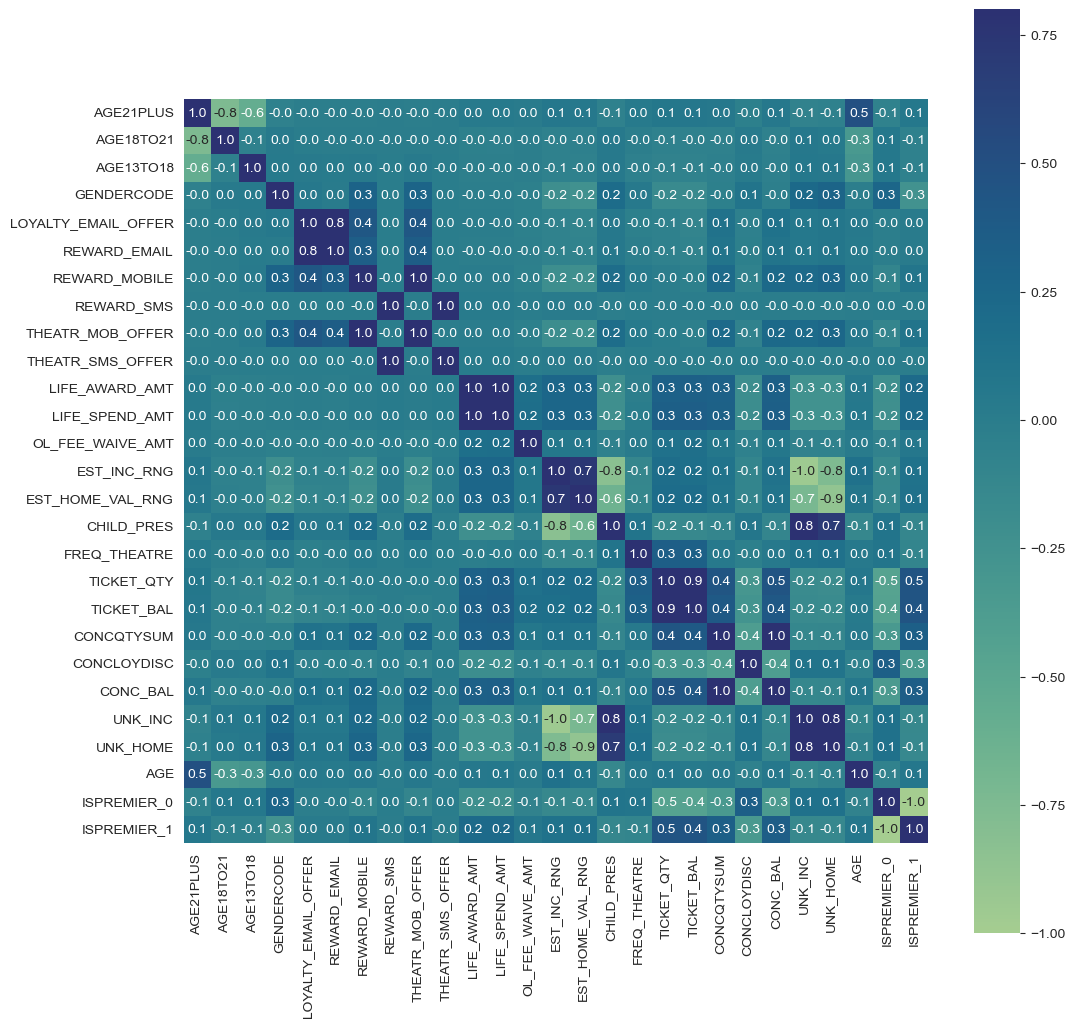

In [229]:
# Correlation plot (heat map)

plt.figure(figsize=(12,12))
sns.heatmap(data_dummy.corr(), vmax=.8, square=True, annot=True, cmap="crest",fmt=".1f")
plt.show()

In [231]:
##find out correlation between ISPREMIER & EST_INC_RNG
data_dummy[['ISPREMIER_1','EST_INC_RNG']].corr()

,ISPREMIER_1,EST_INC_RNG
ISPREMIER_1,1.00,0.13
EST_INC_RNG,0.13,1.00


In [233]:
data_dummy.columns

Index(['AGE21PLUS', 'AGE18TO21', 'AGE13TO18', 'GENDERCODE',
       'LOYALTY_EMAIL_OFFER', 'REWARD_EMAIL', 'REWARD_MOBILE', 'REWARD_SMS',
       'THEATR_MOB_OFFER', 'THEATR_SMS_OFFER', 'LIFE_AWARD_AMT',
       'LIFE_SPEND_AMT', 'OL_FEE_WAIVE_AMT', 'EST_INC_RNG', 'EST_HOME_VAL_RNG',
       'CHILD_PRES', 'FREQ_THEATRE', 'TICKET_QTY', 'TICKET_BAL', 'CONCQTYSUM',
       'CONCLOYDISC', 'CONC_BAL', 'UNK_INC', 'UNK_HOME', 'AGE', 'ISPREMIER_0',
       'ISPREMIER_1'],
      dtype='object')

In [235]:
# Creating dummy variable for all categorical values for the correlation of dependent variable with all other variable
data_dummy_all= pd.get_dummies(data_dummy, columns= ["AGE21PLUS","AGE18TO21","AGE13TO18","GENDERCODE","LOYALTY_EMAIL_OFFER","REWARD_EMAIL","REWARD_MOBILE","REWARD_SMS","THEATR_MOB_OFFER","THEATR_SMS_OFFER","EST_INC_RNG","EST_HOME_VAL_RNG","CHILD_PRES","FREQ_THEATRE"],
                     drop_first=True)
data_dummy_all.head()

,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE,ISPREMIER_0,ISPREMIER_1,AGE21PLUS_1,AGE18TO21_1,AGE13TO18_1,GENDERCODE_1,GENDERCODE_3,LOYALTY_EMAIL_OFFER_1,REWARD_EMAIL_1,REWARD_MOBILE_1,REWARD_SMS_1,THEATR_MOB_OFFER_1.0,THEATR_SMS_OFFER_1,EST_INC_RNG_1,EST_INC_RNG_2,EST_INC_RNG_3,EST_INC_RNG_4,EST_INC_RNG_5,EST_INC_RNG_6,EST_INC_RNG_7,EST_INC_RNG_8,EST_INC_RNG_9,EST_HOME_VAL_RNG_1,EST_HOME_VAL_RNG_2,EST_HOME_VAL_RNG_3,EST_HOME_VAL_RNG_4,EST_HOME_VAL_RNG_5,EST_HOME_VAL_RNG_6,EST_HOME_VAL_RNG_7,EST_HOME_VAL_RNG_8,EST_HOME_VAL_RNG_9,EST_HOME_VAL_RNG_10,EST_HOME_VAL_RNG_11,EST_HOME_VAL_RNG_12,EST_HOME_VAL_RNG_13,EST_HOME_VAL_RNG_14,EST_HOME_VAL_RNG_15,EST_HOME_VAL_RNG_16,EST_HOME_VAL_RNG_17,EST_HOME_VAL_RNG_18,EST_HOME_VAL_RNG_19,CHILD_PRES_1,CHILD_PRES_3,FREQ_THEATRE_1
0,0.00,0.00,0.00,2,29.58,0,0.00,0.00,0,0,9,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,5.00,-63.04,0.00,20,191.90,0,0.00,0.00,0,0,24,False,True,False,False,True,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True
2,0.00,34.00,10.00,16,192.84,1,-8.49,0.00,0,0,72,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,0.00,0.00,0.00,0,0.00,1,0.00,0.00,0,0,63,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,0.00,12.08,5.00,10,101.20,0,0.00,0.00,0,0,60,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True


In [237]:
# Importing pingouin for further correlation analysis
!pip install pingouin
import pingouin as pg

In [239]:
data_dummy_all.columns

Index(['LIFE_AWARD_AMT', 'LIFE_SPEND_AMT', 'OL_FEE_WAIVE_AMT', 'TICKET_QTY',
       'TICKET_BAL', 'CONCQTYSUM', 'CONCLOYDISC', 'CONC_BAL', 'UNK_INC',
       'UNK_HOME', 'AGE', 'ISPREMIER_0', 'ISPREMIER_1', 'AGE21PLUS_1',
       'AGE18TO21_1', 'AGE13TO18_1', 'GENDERCODE_1', 'GENDERCODE_3',
       'LOYALTY_EMAIL_OFFER_1', 'REWARD_EMAIL_1', 'REWARD_MOBILE_1',
       'REWARD_SMS_1', 'THEATR_MOB_OFFER_1.0', 'THEATR_SMS_OFFER_1',
       'EST_INC_RNG_1', 'EST_INC_RNG_2', 'EST_INC_RNG_3', 'EST_INC_RNG_4',
       'EST_INC_RNG_5', 'EST_INC_RNG_6', 'EST_INC_RNG_7', 'EST_INC_RNG_8',
       'EST_INC_RNG_9', 'EST_HOME_VAL_RNG_1', 'EST_HOME_VAL_RNG_2',
       'EST_HOME_VAL_RNG_3', 'EST_HOME_VAL_RNG_4', 'EST_HOME_VAL_RNG_5',
       'EST_HOME_VAL_RNG_6', 'EST_HOME_VAL_RNG_7', 'EST_HOME_VAL_RNG_8',
       'EST_HOME_VAL_RNG_9', 'EST_HOME_VAL_RNG_10', 'EST_HOME_VAL_RNG_11',
       'EST_HOME_VAL_RNG_12', 'EST_HOME_VAL_RNG_13', 'EST_HOME_VAL_RNG_14',
       'EST_HOME_VAL_RNG_15', 'EST_HOME_VAL_RNG_16', 'EST

In [241]:
# Pairwise correlation with targeted variable 
pg.pairwise_corr(data=data_dummy_all, columns='ISPREMIER_1', method='spearman').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,ISPREMIER_1,LIFE_AWARD_AMT,spearman,two-sided,47168,0.27,"[0.26, 0.28]",0.00,1.00
1,ISPREMIER_1,LIFE_SPEND_AMT,spearman,two-sided,47168,0.20,"[0.19, 0.21]",0.00,1.00
2,ISPREMIER_1,OL_FEE_WAIVE_AMT,spearman,two-sided,47168,0.17,"[0.16, 0.18]",0.00,1.00
3,ISPREMIER_1,TICKET_QTY,spearman,two-sided,47168,0.41,"[0.4, 0.42]",0.00,1.00
4,ISPREMIER_1,TICKET_BAL,spearman,two-sided,47168,0.41,"[0.4, 0.41]",0.00,1.00
5,ISPREMIER_1,CONCQTYSUM,spearman,two-sided,47168,0.30,"[0.29, 0.31]",0.00,1.00
6,ISPREMIER_1,CONCLOYDISC,spearman,two-sided,47168,-0.62,"[-0.63, -0.62]",0.00,1.00
7,ISPREMIER_1,CONC_BAL,spearman,two-sided,47168,0.30,"[0.3, 0.31]",0.00,1.00
8,ISPREMIER_1,UNK_INC,spearman,two-sided,47168,-0.13,"[-0.14, -0.12]",0.00,1.00
9,ISPREMIER_1,UNK_HOME,spearman,two-sided,47168,-0.14,"[-0.14, -0.13]",0.00,1.00


In [243]:
# selecting only few columns from above result
pg.pairwise_corr(data=data_dummy_all, columns='ISPREMIER_1', method='spearman').sort_values(by=['p-unc'])[['X','Y','n','r','p-unc']].round(3)

,X,Y,n,r,p-unc
0,ISPREMIER_1,LIFE_AWARD_AMT,47168,0.27,0.00
1,ISPREMIER_1,LIFE_SPEND_AMT,47168,0.20,0.00
2,ISPREMIER_1,OL_FEE_WAIVE_AMT,47168,0.17,0.00
3,ISPREMIER_1,TICKET_QTY,47168,0.41,0.00
4,ISPREMIER_1,TICKET_BAL,47168,0.41,0.00
5,ISPREMIER_1,CONCQTYSUM,47168,0.30,0.00
6,ISPREMIER_1,CONCLOYDISC,47168,-0.62,0.00
7,ISPREMIER_1,CONC_BAL,47168,0.30,0.00
11,ISPREMIER_1,ISPREMIER_0,47168,-1.00,0.00
16,ISPREMIER_1,GENDERCODE_3,47168,-0.28,0.00


## 4. Part IV: Storytelling: Provide the most significant/interesting findings, related to the problem statement below, from your analysis (Part III). 

- Who are the customers that are likely to convert to Premier? 
- Who are the customers that utilize Premier? 
- Who are the customers that utilize Insider?

### Who are the customers that are likely to convert to Premier?

- The customers who are likely to upgrade to Premier (ISPREMIER) are mostly in the 35 to 60 age group
- Those with incomes of $100,000-$124,999 and greater than $124,999, are more likely to convert Premier memberships. 
- People without children are more likely to upgrade to Premier.

### Who are the customers that utilize Premier?

- The poeple who have earned Amount of rewards utilize premier more. 
- Number of concession items purchased by member utilize the ISPREMIER membership. 
- Premier members tend to buy more tickets.
- Premier members are more likely to opt for reward emails and mobile notifications.

### Who are the customers that utilize Insider?

- INSIDER are the most frequently visited theatre compare to ISPREMEIR.
- In the age of 23 to 30 people used thier INSIDER membership. 


# Section 2. Machine Learning

## Part I. Classification

### Data preprocessor for classification

In [250]:
data.columns

Index(['ISPREMIER', 'AGE21PLUS', 'AGE18TO21', 'AGE13TO18', 'GENDERCODE',
       'LOYALTY_EMAIL_OFFER', 'REWARD_EMAIL', 'REWARD_MOBILE', 'REWARD_SMS',
       'THEATR_MOB_OFFER', 'THEATR_SMS_OFFER', 'LIFE_AWARD_AMT',
       'LIFE_SPEND_AMT', 'OL_FEE_WAIVE_AMT', 'EST_INC_RNG', 'EST_HOME_VAL_RNG',
       'CHILD_PRES', 'FREQ_THEATRE', 'TICKET_QTY', 'TICKET_BAL', 'CONCQTYSUM',
       'CONCLOYDISC', 'CONC_BAL', 'UNK_INC', 'UNK_HOME', 'AGE'],
      dtype='object')

In [252]:
# Declar x & y variable 

y= data['ISPREMIER']
X= data.drop(['ISPREMIER'], axis=1)

In [254]:
num_cols = ['LIFE_AWARD_AMT', 'LIFE_SPEND_AMT', 'OL_FEE_WAIVE_AMT','TICKET_QTY','TICKET_BAL','CONCQTYSUM','CONCLOYDISC','CONC_BAL','AGE']
cat_cols = ['AGE21PLUS', 'AGE18TO21', 'AGE13TO18', 'GENDERCODE',
       'LOYALTY_EMAIL_OFFER', 'REWARD_EMAIL', 'REWARD_MOBILE', 'REWARD_SMS',
       'THEATR_MOB_OFFER', 'THEATR_SMS_OFFER','EST_INC_RNG', 'EST_HOME_VAL_RNG','CHILD_PRES', 'FREQ_THEATRE','UNK_INC', 'UNK_HOME']

In [256]:
# Numeric transformer (StandardScaler for feature scaling)
num_transformer = StandardScaler()

# Categorical transformer (OneHotEncoder for one-hot encoding)
cat_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

In [258]:
# data Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

In [260]:
# Transform the data
X_transformed = preprocessor.fit_transform(X)
pd.DataFrame(X_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,-0.16,-0.18,-0.08,-0.07,0.17,-0.46,0.19,-0.47,-2.59,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,0.00,-0.39,-0.08,4.64,4.26,-0.46,0.19,-0.47,-1.56,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00
2,-0.16,-0.06,0.32,3.59,4.29,-0.23,-8.17,-0.47,1.72,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
3,-0.16,-0.18,-0.08,-0.60,-0.58,-0.23,0.19,-0.47,1.10,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
4,-0.16,-0.14,0.12,2.02,1.98,-0.46,0.19,-0.47,0.90,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00


In [262]:
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
new_feature_names = np.concatenate([num_cols, ohe_feature_names])

# Create a DataFrame with the transformed features
X_transformed_data = pd.DataFrame(X_transformed, columns=new_feature_names)

X_transformed_data.head()

,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,AGE,AGE21PLUS_1,AGE18TO21_1,AGE13TO18_1,GENDERCODE_1,GENDERCODE_3,LOYALTY_EMAIL_OFFER_1,REWARD_EMAIL_1,REWARD_MOBILE_1,REWARD_SMS_1,THEATR_MOB_OFFER_1.0,THEATR_SMS_OFFER_1,EST_INC_RNG_1,EST_INC_RNG_2,EST_INC_RNG_3,EST_INC_RNG_4,EST_INC_RNG_5,EST_INC_RNG_6,EST_INC_RNG_7,EST_INC_RNG_8,EST_INC_RNG_9,EST_HOME_VAL_RNG_1,EST_HOME_VAL_RNG_2,EST_HOME_VAL_RNG_3,EST_HOME_VAL_RNG_4,EST_HOME_VAL_RNG_5,EST_HOME_VAL_RNG_6,EST_HOME_VAL_RNG_7,EST_HOME_VAL_RNG_8,EST_HOME_VAL_RNG_9,EST_HOME_VAL_RNG_10,EST_HOME_VAL_RNG_11,EST_HOME_VAL_RNG_12,EST_HOME_VAL_RNG_13,EST_HOME_VAL_RNG_14,EST_HOME_VAL_RNG_15,EST_HOME_VAL_RNG_16,EST_HOME_VAL_RNG_17,EST_HOME_VAL_RNG_18,EST_HOME_VAL_RNG_19,CHILD_PRES_1,CHILD_PRES_3,FREQ_THEATRE_1,UNK_INC_1,UNK_HOME_1
0,-0.16,-0.18,-0.08,-0.07,0.17,-0.46,0.19,-0.47,-2.59,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,0.00,-0.39,-0.08,4.64,4.26,-0.46,0.19,-0.47,-1.56,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00
2,-0.16,-0.06,0.32,3.59,4.29,-0.23,-8.17,-0.47,1.72,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
3,-0.16,-0.18,-0.08,-0.60,-0.58,-0.23,0.19,-0.47,1.10,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
4,-0.16,-0.14,0.12,2.02,1.98,-0.46,0.19,-0.47,0.90,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00


## 1) Use the following algorithms (DT, LR, RF)

### a) Decision tree & simple decision tree

In [266]:
# split validation (Full grown decision tree)

X_train, X_test, y_train, y_test = train_test_split(X_transformed_data, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt= DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [268]:
#Model evaluation

print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.955126846159282
--------------------------------------------------------
[[12242   307]
 [  328  1274]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     12549
           1       0.81      0.80      0.80      1602

    accuracy                           0.96     14151
   macro avg       0.89      0.89      0.89     14151
weighted avg       0.95      0.96      0.95     14151

--------------------------------------------------------
0.8853959146811167


### Confusion matrix of Full grown decision tree
- 12,252 customers are Insider members correctly classified as Insider.
  
- 297 customers are Premier members, but the model incorrectly predicted them as Insider.

  
- 322 customers are actually Insider members, but the model incorrectly predicted them as Premier.

  
- 1,280 customers are Premier members correctly classified as Premier.

In [271]:
# split validation. creating for (simple decision tree)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=0)

 # naming simple decision tree as dt_simple
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt_simple.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [273]:
#Model evaluation

print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test)))


0.9436082255670978
--------------------------------------------------------
[[12206   343]
 [  455  1147]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     12549
           1       0.77      0.72      0.74      1602

    accuracy                           0.94     14151
   macro avg       0.87      0.84      0.86     14151
weighted avg       0.94      0.94      0.94     14151

--------------------------------------------------------
0.8443235848806013


### Confusion matrix of Simple decision tree
- 12,206 customers are Insider members correctly classified as Insider.

- 343 customers are Premier members, but the model incorrectly predicted them as Insider.

- 455 customers are actually Insider members, but the model incorrectly predicted them as Premier.

- 1,147 customers are Premier members correctly classified as Premier.



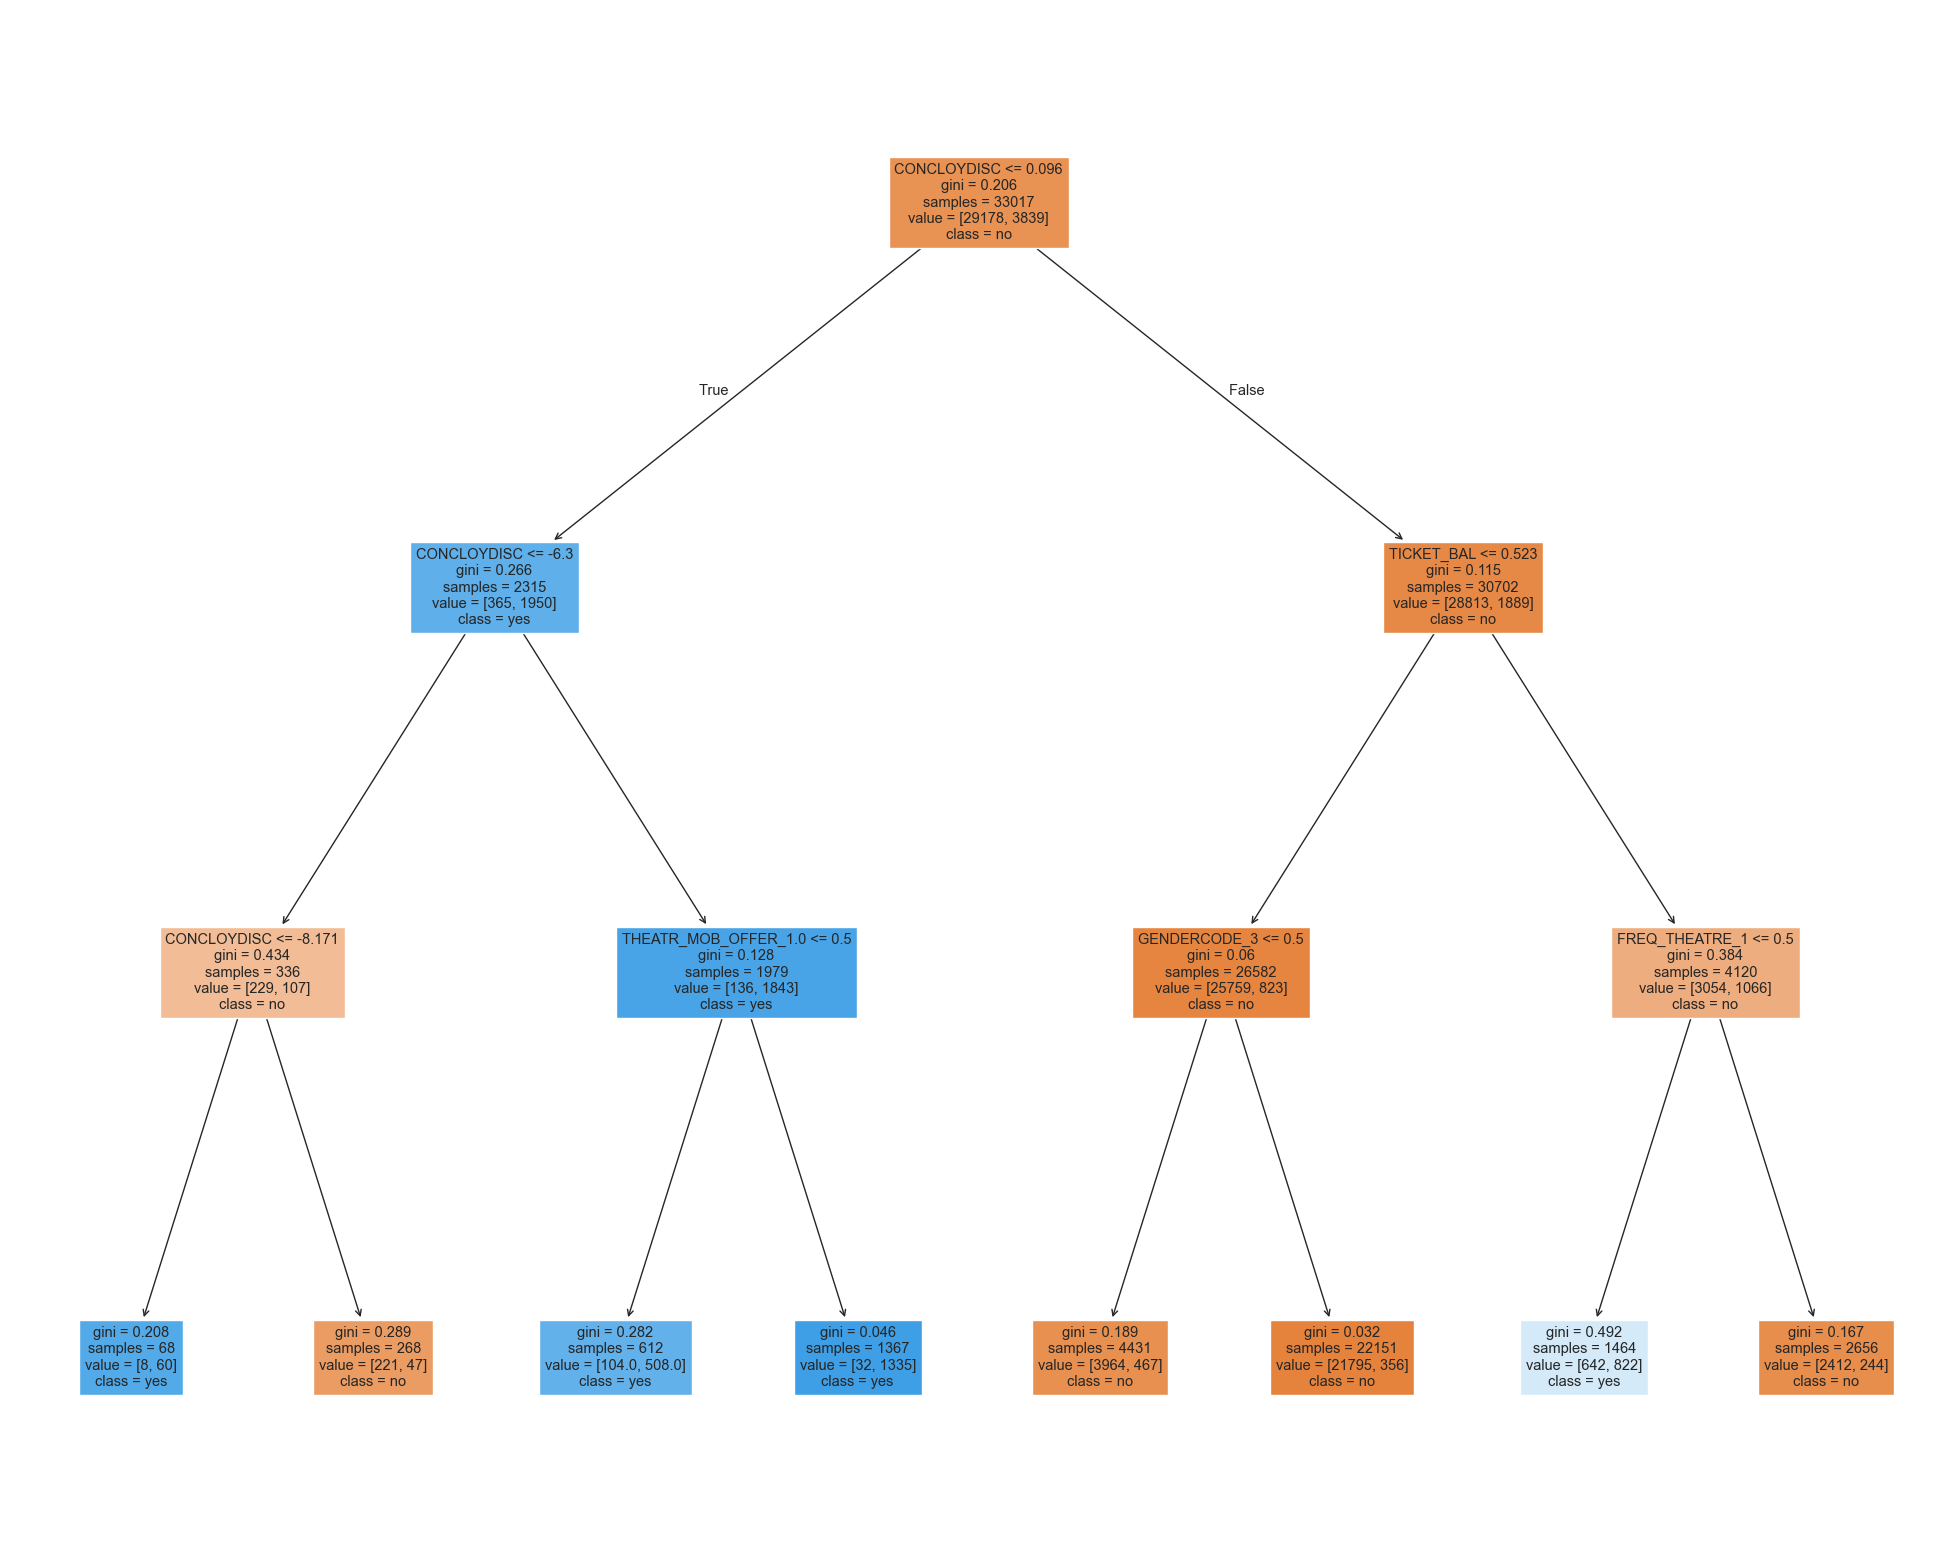

In [276]:
# VIsualization of simple decision tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_simple, 
                feature_names = list(X_transformed_data.columns), 
                class_names=['no','yes'],    # no: INSIDER, yes: ISPREMIER
                filled = True)
plt.show()

In [278]:
# saving decision tree 
fig.savefig("decision_tree.png")

In [280]:
# Text Representation of decision tree
text_representation = tree.export_text(dt_simple, 
                                       feature_names=(list(X_transformed_data.columns)))
print(text_representation)

|--- CONCLOYDISC <= 0.10
|   |--- CONCLOYDISC <= -6.30
|   |   |--- CONCLOYDISC <= -8.17
|   |   |   |--- class: 1
|   |   |--- CONCLOYDISC >  -8.17
|   |   |   |--- class: 0
|   |--- CONCLOYDISC >  -6.30
|   |   |--- THEATR_MOB_OFFER_1.0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- THEATR_MOB_OFFER_1.0 >  0.50
|   |   |   |--- class: 1
|--- CONCLOYDISC >  0.10
|   |--- TICKET_BAL <= 0.52
|   |   |--- GENDERCODE_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- GENDERCODE_3 >  0.50
|   |   |   |--- class: 0
|   |--- TICKET_BAL >  0.52
|   |   |--- FREQ_THEATRE_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- FREQ_THEATRE_1 >  0.50
|   |   |   |--- class: 0



In [282]:
# Saving text representation
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

#### ii) Report the most important variables from the simple decision tree.
- CONCLOYDISC – Used at the top levels, indicating it’s the most influential feature.
- THEATR_MOB_OFFER_1.0 – Used in second-level splits.
- TICKET_BAL – Important in differentiating further branches.

#### iii) Explain a couple of decision rules from the simple decision tree.

**** If
CONCLOYDISC <= -8.17
 then predict Premier (class: 1)

- This means customers with very high concession loyalty discount usage are likely Premier.

**** If
CONCLOYDISC > 0.10
AND TICKET_BAL > 0.52
AND FREQ_THEATRE_1 <= 0.50
 then predict Premier (class: 1)

- This suggests that customers who spend more on tickets but don’t visit frequently might be Premier members



### b) Logistic regression.

In [287]:
# Logistic regression initialization. Split validation already has been done in decision tree

lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [289]:
# print coefficients
coef = pd.DataFrame(list(zip(X_transformed_data.columns, np.transpose(lr.coef_))), 
             columns=['X variables', 'coef']).sort_values('coef', ascending=False)

coef['coef'] = coef['coef'].str[0]
coef.head(10)

,X variables,coef
0,LIFE_AWARD_AMT,2.54
18,THEATR_MOB_OFFER_1.0,1.01
4,TICKET_BAL,0.95
3,TICKET_QTY,0.66
52,UNK_HOME_1,0.61
16,REWARD_MOBILE_1,0.55
12,GENDERCODE_1,0.53
7,CONC_BAL,0.49
21,EST_INC_RNG_2,0.31
23,EST_INC_RNG_4,0.27


In [291]:
#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.9288389513108615
[[12297   252]
 [  755   847]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12549
           1       0.77      0.53      0.63      1602

    accuracy                           0.93     14151
   macro avg       0.86      0.75      0.79     14151
weighted avg       0.92      0.93      0.92     14151

0.7543164129943952


In [293]:
# probabilities of class
probs = lr.predict_proba(X_test)
print(probs[:5])

[[0.11 0.89]
 [0.98 0.02]
 [0.90 0.10]
 [0.96 0.04]
 [1.00 0.00]]


- First column represent probability of INSIDER membership
- Second colums is about ISPREMIER membership

- As it can be seen from the probabilty prediction. in first row of probabilty prediction it says 89% of probabilty that this person likely to convert thier membership to ISPREMIER and 12% probability that they won't.  

### c) Random forest. What are the important variables?

In [298]:
# Random forest building 20 decision trees. 

clf = RandomForestClassifier(n_estimators=20)    
clf=clf.fit(X_train, y_train)

In [300]:
# generate evaluation metrics

print(metrics.accuracy_score(y_test, clf.predict(X_test)))
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9665748003674652
[[12419   130]
 [  343  1259]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12549
           1       0.91      0.79      0.84      1602

    accuracy                           0.97     14151
   macro avg       0.94      0.89      0.91     14151
weighted avg       0.97      0.97      0.97     14151



In [302]:
# Important variables. Showing only 5 
pd.DataFrame(clf.feature_importances_, index = X_transformed_data.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).head()

,importance
CONCLOYDISC,0.20
TICKET_BAL,0.13
TICKET_QTY,0.10
LIFE_SPEND_AMT,0.09
FREQ_THEATRE_1,0.08


- From the Random forest model CONCLOYDISC is the most important variable. After that TICKET_BAL & TICKET_QTY is second most important variables. 

### d) Now, build a classification model using one of the feature selection techniques.

In [306]:
# using Extra tree classifier for feature selection for classification.
from sklearn.ensemble import ExtraTreesClassifier

model_extra = ExtraTreesClassifier()
model_extra.fit(X_transformed, y)
print(model_extra.score(X_transformed, y))

# display the relative importance of each variable
print((model_extra.feature_importances_))

0.9980919267299865
[0.02 0.07 0.03 0.12 0.12 0.04 0.12 0.06 0.05 0.00 0.00 0.00 0.02 0.07
 0.01 0.01 0.05 0.00 0.05 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.01 0.06 0.01 0.02]


In [308]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X_transformed_data.columns))[:5])

Features sorted by their rank:
[(0.0, 'REWARD_SMS_1'), (0.0, 'THEATR_SMS_OFFER_1'), (0.0006, 'EST_HOME_VAL_RNG_1'), (0.0009, 'EST_INC_RNG_1'), (0.001, 'EST_INC_RNG_2')]


In [310]:
# Sorting top 5 important variable.
pd.DataFrame(model_extra.feature_importances_, index = X_transformed_data.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).head()

,importance
TICKET_BAL,0.12
CONCLOYDISC,0.12
TICKET_QTY,0.12
LIFE_SPEND_AMT,0.07
GENDERCODE_3,0.07


## 2) Create ROC plot to compare the performance of DT, LR, and RF

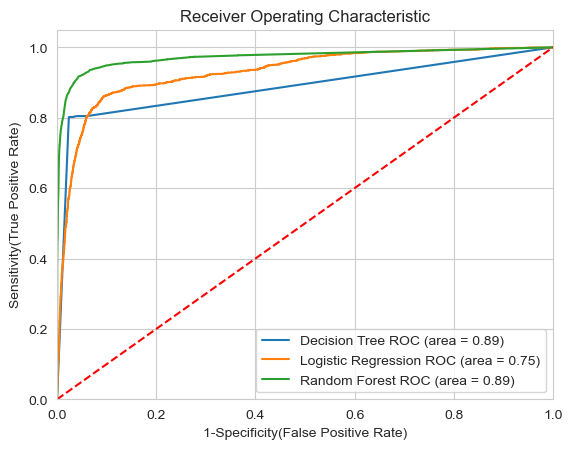

In [313]:
plt.figure()

models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=500),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   

## 3) What is your best classification model?

### a) What is the model accuracy?

- Random Forest is the best model. 
- Accuracy for Random Forest model is 97%
- The model accuracy for Decision Tree is 94
- CONCLOYDISC is the common important variable from both Decision Tree & Random Forest model.

### b) True positive rate? False positive rate?

In [319]:
print("False-positive rate:", fpr[:5])
print("True-positive rate: ", tpr[:5])

False-positive rate: [0.00 0.00 0.00 0.00 0.00]
True-positive rate:  [0.00 0.03 0.08 0.13 0.18]


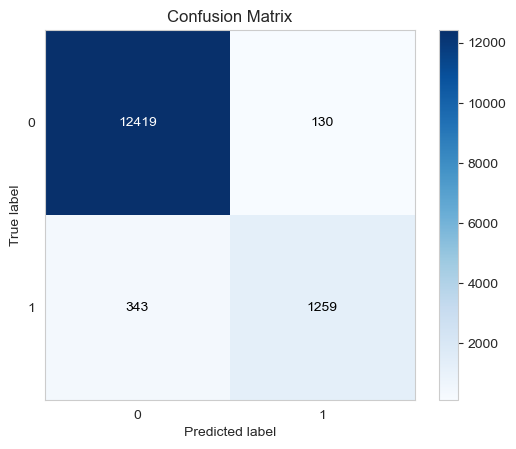

In [321]:
# Ture positive rate & False positive rate from Random Forest model
#%pip install scipy==1.11.4
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=clf.predict(X_test))
plt.show()

- True Positive Rate = 1259/343= 0.78
- False Positive Rate  = 130/12419 = 0.00 
- Hight TPR is good sign 
- Low FPR is good sign 

### c) What is ROC score?

In [325]:
print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test))) # ROC score of Decision Tree
print(metrics.roc_auc_score(y_test, lr.predict(X_test))) # ROC score of Logistic regression
print(metrics.roc_auc_score(y_test, clf.predict(X_test))) # ROC score of Random Forest

0.8443235848806013
0.7543164129943952
0.8877666215103461


- The ROC score for Decision Tree is 84%
- Random Forest ROC score is 89%
- Logistic regression ROC score is low compare to other two model which is 75%. 

## Part II. Regression

### 1) Before building regression models, remove the following columns: 'TICKET_QTY', 'FREQ_THEATRE', 'ISPREMIER'.

In [330]:
# Removing columns. 
data = data.drop(['TICKET_QTY','FREQ_THEATRE','ISPREMIER'], axis=1)
data.head(2)

,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,UNK_INC,UNK_HOME,AGE
0,0,0,0,0,1,1,0,0,0.00,0,0.00,0.00,0.00,8,19,0,29.58,0,0.00,0.00,0,0,9
1,0,0,1,3,1,1,1,0,1.00,0,5.00,-63.04,0.00,8,19,3,191.90,0,0.00,0.00,0,0,24


### 2) TICKET_BAL contains inconsistent (or abnormal) data (e.g., extremely large TICKET_BAL). First, use a simple data visualization or BI technique (e.g., sort_values) to detect extremely large TICKET_BAL. Then, remove the row or rows containing those values from the data frame.

In [333]:
 data['TICKET_BAL'].sort_values(ascending = False).head()

31627   969.09
5938    842.00
28338   675.66
6270    616.61
1223    607.53
Name: TICKET_BAL, dtype: float64

- Since I have removed that row from the data there is no large values

### 3) Build regression models using three different regression algorithms. The Y value is TICKET_BAL. It is important to use model validation and feature selection in models.

### a) Linear regression

In [338]:
data= pd.get_dummies(data, columns= ["AGE21PLUS","AGE18TO21","AGE13TO18","GENDERCODE","LOYALTY_EMAIL_OFFER","REWARD_EMAIL","REWARD_MOBILE","REWARD_SMS","THEATR_MOB_OFFER","THEATR_SMS_OFFER","EST_INC_RNG","EST_HOME_VAL_RNG","CHILD_PRES","UNK_INC","UNK_HOME"],
                     prefix= ["AGE21PLUS","AGE18TO21","AGE13TO18","GENDERCODE","LOYALTY_EMAIL_OFFER","REWARD_EMAIL","REWARD_MOBILE","REWARD_SMS","THEATR_MOB_OFFER","THEATR_SMS_OFFER","EST_INC_RNG","EST_HOME_VAL_RNG","CHILD_PRES","UNK_INC","UNK_HOME"],
                     drop_first=True)
data.head(2)

,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,AGE,AGE21PLUS_1,AGE18TO21_1,AGE13TO18_1,GENDERCODE_1,GENDERCODE_3,LOYALTY_EMAIL_OFFER_1,REWARD_EMAIL_1,REWARD_MOBILE_1,REWARD_SMS_1,THEATR_MOB_OFFER_1.0,THEATR_SMS_OFFER_1,EST_INC_RNG_1,EST_INC_RNG_2,EST_INC_RNG_3,EST_INC_RNG_4,EST_INC_RNG_5,EST_INC_RNG_6,EST_INC_RNG_7,EST_INC_RNG_8,EST_INC_RNG_9,EST_HOME_VAL_RNG_1,EST_HOME_VAL_RNG_2,EST_HOME_VAL_RNG_3,EST_HOME_VAL_RNG_4,EST_HOME_VAL_RNG_5,EST_HOME_VAL_RNG_6,EST_HOME_VAL_RNG_7,EST_HOME_VAL_RNG_8,EST_HOME_VAL_RNG_9,EST_HOME_VAL_RNG_10,EST_HOME_VAL_RNG_11,EST_HOME_VAL_RNG_12,EST_HOME_VAL_RNG_13,EST_HOME_VAL_RNG_14,EST_HOME_VAL_RNG_15,EST_HOME_VAL_RNG_16,EST_HOME_VAL_RNG_17,EST_HOME_VAL_RNG_18,EST_HOME_VAL_RNG_19,CHILD_PRES_1,CHILD_PRES_3,UNK_INC_1,UNK_HOME_1
0,0.00,0.00,0.00,29.58,0,0.00,0.00,9,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,5.00,-63.04,0.00,191.90,0,0.00,0.00,24,False,False,True,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [340]:
# Assigning x & y variables 

y = data['TICKET_BAL']
X = data.drop(['TICKET_BAL'], axis=1)

print(X.shape, y.shape)

(47168, 50) (47168,)


In [342]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33017, 50) (33017,) (14151, 50) (14151,)


In [344]:
# Model 1 Building

model1 = lm.LinearRegression()
model1.fit(X_train, y_train)  # Train
model1_y = model1.predict(X_test) # Test

In [346]:
# Model Evaluation

print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [-3.25 0.37 0.11 -0.19 -3.75 0.50 -0.03 -2.14 -4.86 -8.50 4.99 -10.53
 -9.95 -1.70 0.23 -8.81 -1.21 -8.81 -0.49 0.98 0.62 -4.98 1.05 1.74 -0.71
 1.76 -0.14 -7.37 -3.70 -6.75 -5.81 -4.30 -2.21 -4.10 -2.76 -5.87 -0.37
 -1.92 5.92 1.93 2.98 -0.26 3.45 4.79 9.28 12.30 1.40 2.51 -0.32 -2.60]
y-intercept  35.548123895137756


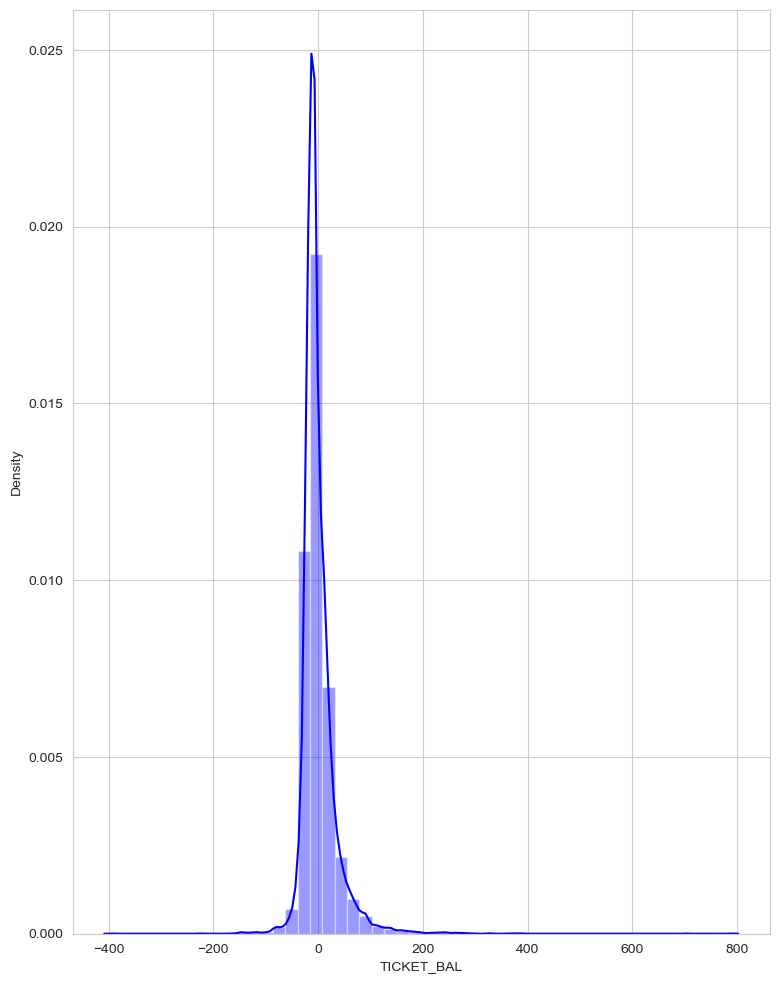

In [356]:
# Visualization of residualas
#sns.set_palette("pastel")
sns.color_palette("Spectral")
#sns.color_palette("light:#5A9", as_cmap=True)

# plotting residuals graph 
fig = plt.figure(figsize=(9,12))
residuals = (y_test - model1_y)
sns.distplot(residuals, color='blue')
plt.show()

In [358]:
m1 = pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_)))).round(2)
m1.head(10)

,0,1
0,LIFE_AWARD_AMT,-3.25
1,LIFE_SPEND_AMT,0.37
2,OL_FEE_WAIVE_AMT,0.11
3,CONCQTYSUM,-0.19
4,CONCLOYDISC,-3.75
5,CONC_BAL,0.50
6,AGE,-0.03
7,AGE21PLUS_1,-2.14
8,AGE18TO21_1,-4.86
9,AGE13TO18_1,-8.50


#### i) Report the model accuracy

In [361]:
# model accuracy of Linear regression
accuracy = model1.score(X_train, y_train)
accuracy

0.31174521486248796

In [363]:
print("mean square error: ", mean_squared_error(y_test, model1_y))
print("variance or r-squared: ", explained_variance_score(y_test, model1_y))

mean square error:  1135.295900848483
variance or r-squared:  0.30606802622252616


- The model accuracy is very low from this model.
- Lot of error can be seen in this model
- Variance is also very low

#### ii) Visualize actual vs predicted

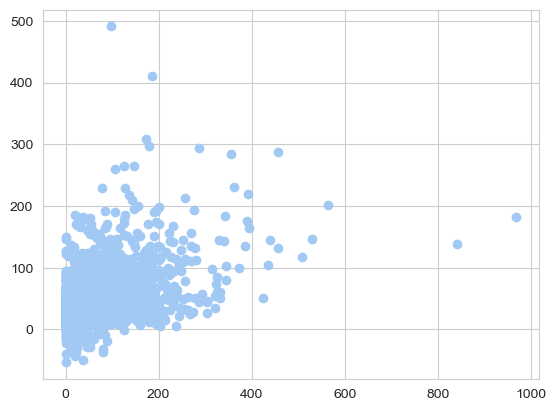

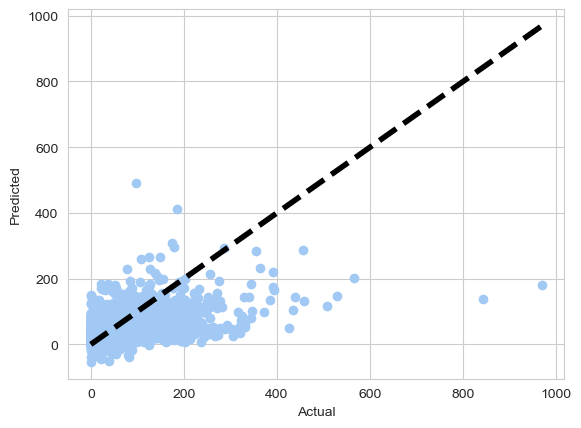

In [372]:
plt.subplots()
plt.scatter(y_test, model1_y)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

- Dots represents as actual Y and the dotted lines are predicted y.  
- This full model is not good, using simple model would be better to find good accuarcy.

### b) Lasso

In [353]:
# Model 2 Building

model2= lm.Lasso(alpha=1) 
model2.fit(X_train, y_train)
model2_y = model2.predict(X_test)

In [354]:
# Model Evaluation

print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [-3.05 0.35 0.12 0.00 -2.88 0.47 0.01 0.00 -0.00 -0.00 0.00 -7.72 -5.70
 -0.00 -0.00 -0.00 -0.10 -0.00 -0.00 0.00 0.00 -0.00 0.00 0.00 0.00 0.00
 0.00 -0.00 -0.00 -0.00 -0.00 -0.00 0.00 -0.00 0.00 -0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 -0.00 -0.00 -0.00]
y-intercept  23.9614970600662


In [357]:
m2 =pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_)))).round(2)
m2.head(10)

,0,1
0,LIFE_AWARD_AMT,-3.05
1,LIFE_SPEND_AMT,0.35
2,OL_FEE_WAIVE_AMT,0.12
3,CONCQTYSUM,0.00
4,CONCLOYDISC,-2.88
5,CONC_BAL,0.47
6,AGE,0.01
7,AGE21PLUS_1,0.00
8,AGE18TO21_1,-0.00
9,AGE13TO18_1,-0.00


#### i) Report the model accuracy

In [360]:
# model accuracy of Lass0
accuracy = model2.score(X_train, y_train)
accuracy

0.29743721310709614

In [362]:
print("mean square error: ", mean_squared_error(y_test, model2_y))
print("variance or r-squared: ", explained_variance_score(y_test, model2_y))

mean square error:  1157.4003054615278
variance or r-squared:  0.29254479107402376


- Variance is low and MSE is also high. The goal is to low MSE and high Variance.

#### ii) Visualize actual vs predicted

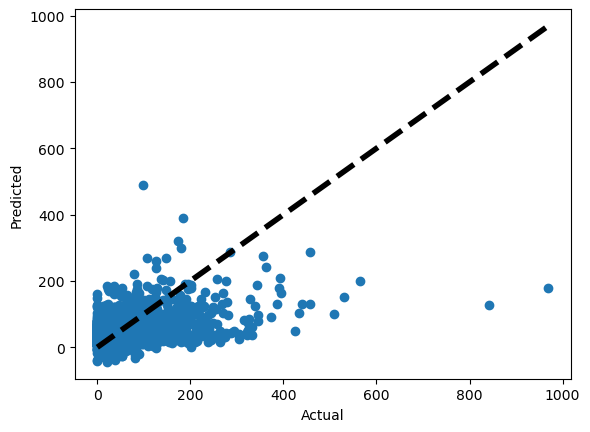

In [366]:
plt.subplots()
plt.scatter(y_test, model2_y)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### c) Randomforestregressor

In [369]:
# Model 3 Building

model3 = RandomForestRegressor(random_state=0)
model3.fit(X_train, y_train)
model3_y = model3.predict(X_test)

In [370]:
# Top 10 important feature 
m3 =pd.DataFrame(model3.feature_importances_, index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
m3.head(10)

,importance
LIFE_SPEND_AMT,0.48
OL_FEE_WAIVE_AMT,0.11
CONC_BAL,0.11
AGE,0.07
CONCLOYDISC,0.05
CONCQTYSUM,0.04
LIFE_AWARD_AMT,0.03
GENDERCODE_3,0.01
REWARD_MOBILE_1,0.01
THEATR_MOB_OFFER_1.0,0.01


#### i) Report the model accuracy

In [372]:
print("mean square error: ", mean_squared_error(y_test, model3_y))
print("variance or r-squared: ", explained_variance_score(y_test, model3_y))

mean square error:  731.464612581279
variance or r-squared:  0.552926025143287


#### ii) Visualize actual vs predicted

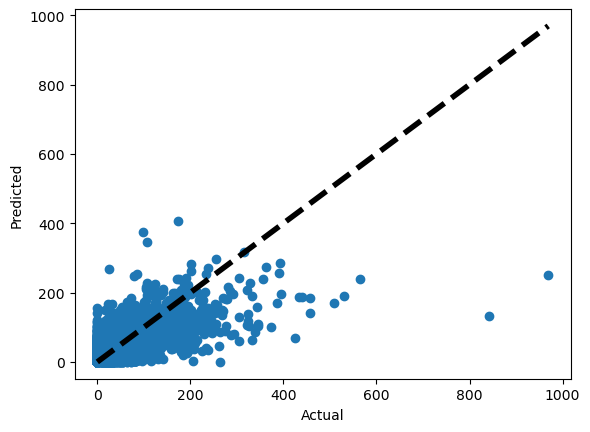

In [374]:
plt.subplots()
plt.scatter(y_test, model3_y)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### 4) What is your best model?

- Above all three regression model Randomforestregressor turned out to be the best model using all X variables. The MSE of Randomforestregressor is lower than the other 2 algorithm. 
- In regression the target is to minimize SSE and we can find it by calculating MSE.
- Other two Linear regression & lasso also included all the X variables but still thier accuracy very low. 
- Randomforestregressor is known to be very accurate and in this data set it proved true.

#### a) What is the accuracy?

In [378]:
# Model3 (Randomforestregressor)
accuracy = model3.score(X_train, y_train)
accuracy

0.8977315132758624

In [379]:
# Model 3 accuracy (Randomforestregressor)
print("mean square error: ", mean_squared_error(y_test, model3_y))
print("variance or r-squared: ", explained_variance_score(y_test, model3_y))

mean square error:  731.464612581279
variance or r-squared:  0.552926025143287


- In model 3 I used Randomforestregressor and even though error is high but the variance is way more better than other 2 algorithms. High variance is good for model.
-  Linear regression & lasso's MSE is high and the variance is very low near to 31%. So Randomforestregressor has to be a best model for this data frame.

#### b) What variables are considered important for predicting TICKET_BAL?

- LIFE_SPEND_AMT, OL_FEE_WAIVE_AMT, CONC_BAL is the most important variable according to Randomforestregressor from predicted Y(TICKET_BAL) variable. 
- Since the Randomforestregressor model accuracy is better than other 2 algorithms, LIFE_SPEND_AMT, OL_FEE_WAIVE_AMT, CONC_BAL are belive to be important variable on predicted TICKET_BAL.
- LIFE_SPEND_AMT is common variable from all 3 regression algorithms. there are some negative Coefficients in both Linear and lasso regression.

## Part III Clustering

In [384]:
# Normalizing data and saving as data_norm
# Select only numeric columns (excluding bool)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Normalize only those columns
data_norm = data.copy()
data_norm[numeric_cols] = (data[numeric_cols] - data[numeric_cols].mean()) / (data[numeric_cols].max() - data[numeric_cols].min())
data_norm.head()

,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,AGE,AGE21PLUS_1,AGE18TO21_1,AGE13TO18_1,GENDERCODE_1,GENDERCODE_3,LOYALTY_EMAIL_OFFER_1,REWARD_EMAIL_1,REWARD_MOBILE_1,REWARD_SMS_1,THEATR_MOB_OFFER_1.0,THEATR_SMS_OFFER_1,EST_INC_RNG_1,EST_INC_RNG_2,EST_INC_RNG_3,EST_INC_RNG_4,EST_INC_RNG_5,EST_INC_RNG_6,EST_INC_RNG_7,EST_INC_RNG_8,EST_INC_RNG_9,EST_HOME_VAL_RNG_1,EST_HOME_VAL_RNG_2,EST_HOME_VAL_RNG_3,EST_HOME_VAL_RNG_4,EST_HOME_VAL_RNG_5,EST_HOME_VAL_RNG_6,EST_HOME_VAL_RNG_7,EST_HOME_VAL_RNG_8,EST_HOME_VAL_RNG_9,EST_HOME_VAL_RNG_10,EST_HOME_VAL_RNG_11,EST_HOME_VAL_RNG_12,EST_HOME_VAL_RNG_13,EST_HOME_VAL_RNG_14,EST_HOME_VAL_RNG_15,EST_HOME_VAL_RNG_16,EST_HOME_VAL_RNG_17,EST_HOME_VAL_RNG_18,EST_HOME_VAL_RNG_19,CHILD_PRES_1,CHILD_PRES_3,UNK_INC_1,UNK_HOME_1
0,-0.01,-0.01,-0.00,0.01,-0.02,0.01,-0.02,-0.42,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,0.00,-0.01,-0.00,0.17,-0.02,0.01,-0.02,-0.25,False,False,True,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
2,-0.01,-0.00,0.00,0.18,-0.01,-0.47,-0.02,0.28,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3,-0.01,-0.01,-0.00,-0.02,-0.01,0.01,-0.02,0.18,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
4,-0.01,-0.00,0.00,0.08,-0.02,0.01,-0.02,0.14,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


### 1) Analyze the data using K-means algorithm.

#### a) Use the Elbow method to determine the optimal K value for K-means analysis.

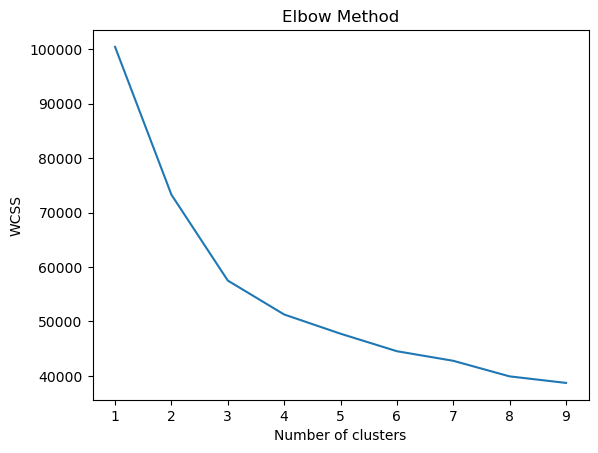

In [387]:
# Within cluster sum of squares
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++',                     
                    n_init='auto', 
                    random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- The elbow point here in for this data looks like 3 or maybe 4 but not more than that.

#### b) Use k = 3 for your clustering model

In [398]:
# clustering analysis using k-means

k_means = KMeans(init='k-means++', 
                 n_init='auto',
                 n_clusters=3, 
                 random_state=0)
k_means

KMeans(n_clusters=3, random_state=0)

In [400]:
k_means.fit(data_norm)

KMeans(n_clusters=3, random_state=0)

In [402]:
# cluster labels

k_means.labels_[:5]

array([2, 0, 2, 2, 2])

In [404]:
# Cluster centers

k_means.cluster_centers_

array([[-0.00, -0.00, -0.00, -0.00, 0.01, -0.00, 0.01, 0.00, 0.88, 0.07,
        0.05, 0.02, 0.94, 0.99, 0.99, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.99, 0.96],
       [-0.00, -0.00, 0.00, 0.00, -0.01, 0.01, -0.01, -0.02, 0.89, 0.07,
        0.04, 0.12, 0.71, 0.63, 0.72, 0.00, -0.00, 0.01, -0.00, 0.01,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.00, 0.00, 0.01, 0.00,
        0.00, 0.00, 0.01, 0.00, 0.00, 0.00, 1.00, 1.00, 0.90],
       [0.02, 0.02, 0.00, 0.01, 0.01, -0.01, 0.01, 0.04, 0.94, 0.04,
        0.02, 0.14, 0.58, 0.76, 0.81, 0.24, 0.00, 0.25, 0.00, 0.02, 0.03,
        0.05, 0.08, 0.10, 0.26, 0.17, 0.08, 0.18, 0.01, 0.02, 0.04, 0.05,
        0.07, 0.07, 0.08, 0.07, 0.06, 0.05, 0.05, 0.04, 0.07, 0.06, 0.04,
   

In [406]:
# converting cluster lables to dataframe

data_clus = pd.DataFrame(k_means.labels_, columns = ['cluster'])
data_clus.head()

,cluster
0,2
1,0
2,2
3,2
4,2


In [408]:
# reset index before joining 
data= data.reset_index(drop=True)
data_clus= data_clus.reset_index(drop=True)

# joining data

data_join= data.join(data_clus)
data_join.head()

,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,AGE,AGE21PLUS_1,AGE18TO21_1,AGE13TO18_1,GENDERCODE_1,GENDERCODE_3,LOYALTY_EMAIL_OFFER_1,REWARD_EMAIL_1,REWARD_MOBILE_1,REWARD_SMS_1,THEATR_MOB_OFFER_1.0,THEATR_SMS_OFFER_1,EST_INC_RNG_1,EST_INC_RNG_2,EST_INC_RNG_3,EST_INC_RNG_4,EST_INC_RNG_5,EST_INC_RNG_6,EST_INC_RNG_7,EST_INC_RNG_8,EST_INC_RNG_9,EST_HOME_VAL_RNG_1,EST_HOME_VAL_RNG_2,EST_HOME_VAL_RNG_3,EST_HOME_VAL_RNG_4,EST_HOME_VAL_RNG_5,EST_HOME_VAL_RNG_6,EST_HOME_VAL_RNG_7,EST_HOME_VAL_RNG_8,EST_HOME_VAL_RNG_9,EST_HOME_VAL_RNG_10,EST_HOME_VAL_RNG_11,EST_HOME_VAL_RNG_12,EST_HOME_VAL_RNG_13,EST_HOME_VAL_RNG_14,EST_HOME_VAL_RNG_15,EST_HOME_VAL_RNG_16,EST_HOME_VAL_RNG_17,EST_HOME_VAL_RNG_18,EST_HOME_VAL_RNG_19,CHILD_PRES_1,CHILD_PRES_3,UNK_INC_1,UNK_HOME_1,cluster
0,0.00,0.00,0.00,29.58,0,0.00,0.00,9,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2
1,5.00,-63.04,0.00,191.90,0,0.00,0.00,24,False,False,True,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,0
2,0.00,34.00,10.00,192.84,1,-8.49,0.00,72,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,2
3,0.00,0.00,0.00,0.00,1,0.00,0.00,63,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,2
4,0.00,12.08,5.00,101.20,0,0.00,0.00,60,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,2


In [409]:
# Find everything is ok
data_join.tail()

,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,AGE,AGE21PLUS_1,AGE18TO21_1,AGE13TO18_1,GENDERCODE_1,GENDERCODE_3,LOYALTY_EMAIL_OFFER_1,REWARD_EMAIL_1,REWARD_MOBILE_1,REWARD_SMS_1,THEATR_MOB_OFFER_1.0,THEATR_SMS_OFFER_1,EST_INC_RNG_1,EST_INC_RNG_2,EST_INC_RNG_3,EST_INC_RNG_4,EST_INC_RNG_5,EST_INC_RNG_6,EST_INC_RNG_7,EST_INC_RNG_8,EST_INC_RNG_9,EST_HOME_VAL_RNG_1,EST_HOME_VAL_RNG_2,EST_HOME_VAL_RNG_3,EST_HOME_VAL_RNG_4,EST_HOME_VAL_RNG_5,EST_HOME_VAL_RNG_6,EST_HOME_VAL_RNG_7,EST_HOME_VAL_RNG_8,EST_HOME_VAL_RNG_9,EST_HOME_VAL_RNG_10,EST_HOME_VAL_RNG_11,EST_HOME_VAL_RNG_12,EST_HOME_VAL_RNG_13,EST_HOME_VAL_RNG_14,EST_HOME_VAL_RNG_15,EST_HOME_VAL_RNG_16,EST_HOME_VAL_RNG_17,EST_HOME_VAL_RNG_18,EST_HOME_VAL_RNG_19,CHILD_PRES_1,CHILD_PRES_3,UNK_INC_1,UNK_HOME_1,cluster
47163,0.00,2.92,0.00,0.00,2,0.00,15.47,30,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,0
47164,0.00,0.00,0.00,0.00,0,0.00,0.00,30,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,1
47165,0.00,0.00,0.00,8.99,0,0.00,0.00,30,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,0
47166,0.00,2.72,0.00,0.00,4,0.00,28.97,9,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,0
47167,0.00,7.34,0.00,72.08,2,0.00,13.44,9,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,0


### 2) This is exploratory data analysis, and need to report the customer (or cluster) “profiles” based on clustering analysis.

In [413]:
data_join.groupby(['cluster']).mean()

,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,AGE,AGE21PLUS_1,AGE18TO21_1,AGE13TO18_1,GENDERCODE_1,GENDERCODE_3,LOYALTY_EMAIL_OFFER_1,REWARD_EMAIL_1,REWARD_MOBILE_1,REWARD_SMS_1,THEATR_MOB_OFFER_1.0,THEATR_SMS_OFFER_1,EST_INC_RNG_1,EST_INC_RNG_2,EST_INC_RNG_3,EST_INC_RNG_4,EST_INC_RNG_5,EST_INC_RNG_6,EST_INC_RNG_7,EST_INC_RNG_8,EST_INC_RNG_9,EST_HOME_VAL_RNG_1,EST_HOME_VAL_RNG_2,EST_HOME_VAL_RNG_3,EST_HOME_VAL_RNG_4,EST_HOME_VAL_RNG_5,EST_HOME_VAL_RNG_6,EST_HOME_VAL_RNG_7,EST_HOME_VAL_RNG_8,EST_HOME_VAL_RNG_9,EST_HOME_VAL_RNG_10,EST_HOME_VAL_RNG_11,EST_HOME_VAL_RNG_12,EST_HOME_VAL_RNG_13,EST_HOME_VAL_RNG_14,EST_HOME_VAL_RNG_15,EST_HOME_VAL_RNG_16,EST_HOME_VAL_RNG_17,EST_HOME_VAL_RNG_18,EST_HOME_VAL_RNG_19,CHILD_PRES_1,CHILD_PRES_3,UNK_INC_1,UNK_HOME_1
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.95,23.88,0.49,18.24,2.57,-0.20,14.85,47.25,0.88,0.07,0.05,0.02,0.94,0.99,0.99,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.99,0.96
1,1.23,16.68,2.49,22.93,0.80,-0.10,4.56,44.88,0.89,0.07,0.04,0.12,0.71,0.63,0.72,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,1.00,1.00,0.90
2,21.42,210.79,5.64,36.12,2.93,-0.40,16.71,50.49,0.94,0.04,0.02,0.14,0.58,0.76,0.81,0.24,0.00,0.25,0.00,0.02,0.03,0.05,0.08,0.10,0.26,0.17,0.08,0.18,0.01,0.02,0.04,0.05,0.07,0.07,0.08,0.07,0.06,0.05,0.05,0.04,0.07,0.06,0.04,0.03,0.08,0.03,0.03,0.61,0.15,0.04,0.05


In [415]:
# Size of the cluster
data_join.groupby(['cluster']).size()

cluster
0    21873
1    17563
2     7732
dtype: int64

- Cluster 0 is the largest cluster

#### a) Build a (simple) decision tree using the cluster analysis results. Note: earlier I removed the rows with extremely large TICKET_BAL so I need to reset_index the data frames (this is the step I took for the dataset containing missing values in the clustering lab).

In [419]:
# set X and y
y = data_join['cluster'].values
X = data_join.drop(['cluster'], axis=1)

In [421]:
# Simple DecisionTree model 

dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# train a dt_simple model

dt_simple.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

#### i) Visualize the decision tree or print decision rules

In [424]:
# Decision tree

text_representation = tree.export_text(dt_simple, feature_names=(list(X.columns)))
print(text_representation)

|--- REWARD_MOBILE_1 <= 0.50
|   |--- UNK_INC_1 <= 0.50
|   |   |--- UNK_HOME_1 <= 0.50
|   |   |   |--- class: 2
|   |   |--- UNK_HOME_1 >  0.50
|   |   |   |--- class: 2
|   |--- UNK_INC_1 >  0.50
|   |   |--- CHILD_PRES_3 <= 0.50
|   |   |   |--- class: 2
|   |   |--- CHILD_PRES_3 >  0.50
|   |   |   |--- class: 1
|--- REWARD_MOBILE_1 >  0.50
|   |--- CHILD_PRES_3 <= 0.50
|   |   |--- UNK_HOME_1 <= 0.50
|   |   |   |--- class: 2
|   |   |--- UNK_HOME_1 >  0.50
|   |   |   |--- class: 2
|   |--- CHILD_PRES_3 >  0.50
|   |   |--- UNK_INC_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- UNK_INC_1 >  0.50
|   |   |   |--- class: 0



#### ii) Report the model accuracy.

In [427]:
# accuracy of the decision tree

dt_simple.score(X,y)

0.991986092265943

- Accuracy of this model is very high

### b) Develop the customer “profiles”. What are the general characteristics of the customers in each cluster?

In [431]:
data_join.groupby(['cluster']).mean()

,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL,AGE,AGE21PLUS_1,AGE18TO21_1,AGE13TO18_1,GENDERCODE_1,GENDERCODE_3,LOYALTY_EMAIL_OFFER_1,REWARD_EMAIL_1,REWARD_MOBILE_1,REWARD_SMS_1,THEATR_MOB_OFFER_1.0,THEATR_SMS_OFFER_1,EST_INC_RNG_1,EST_INC_RNG_2,EST_INC_RNG_3,EST_INC_RNG_4,EST_INC_RNG_5,EST_INC_RNG_6,EST_INC_RNG_7,EST_INC_RNG_8,EST_INC_RNG_9,EST_HOME_VAL_RNG_1,EST_HOME_VAL_RNG_2,EST_HOME_VAL_RNG_3,EST_HOME_VAL_RNG_4,EST_HOME_VAL_RNG_5,EST_HOME_VAL_RNG_6,EST_HOME_VAL_RNG_7,EST_HOME_VAL_RNG_8,EST_HOME_VAL_RNG_9,EST_HOME_VAL_RNG_10,EST_HOME_VAL_RNG_11,EST_HOME_VAL_RNG_12,EST_HOME_VAL_RNG_13,EST_HOME_VAL_RNG_14,EST_HOME_VAL_RNG_15,EST_HOME_VAL_RNG_16,EST_HOME_VAL_RNG_17,EST_HOME_VAL_RNG_18,EST_HOME_VAL_RNG_19,CHILD_PRES_1,CHILD_PRES_3,UNK_INC_1,UNK_HOME_1
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.95,23.88,0.49,18.24,2.57,-0.20,14.85,47.25,0.88,0.07,0.05,0.02,0.94,0.99,0.99,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.99,0.96
1,1.23,16.68,2.49,22.93,0.80,-0.10,4.56,44.88,0.89,0.07,0.04,0.12,0.71,0.63,0.72,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,1.00,1.00,0.90
2,21.42,210.79,5.64,36.12,2.93,-0.40,16.71,50.49,0.94,0.04,0.02,0.14,0.58,0.76,0.81,0.24,0.00,0.25,0.00,0.02,0.03,0.05,0.08,0.10,0.26,0.17,0.08,0.18,0.01,0.02,0.04,0.05,0.07,0.07,0.08,0.07,0.06,0.05,0.05,0.04,0.07,0.06,0.04,0.03,0.08,0.03,0.03,0.61,0.15,0.04,0.05


- Cluster 0: Low rewards earned by customer, low total amount spend by customer, higher customer's who's gender, income, home value are unknown.

- Cluster 1: Low concession items purchased by custmer, lower concessions sold to customer, high ratio of customer's unknow income & unknow home value. 

- Cluster 2: High rewards earned by customer, high total amount spend by customer, high ticket balance, high income range level 8, has children in house, less customer with unknow income & home value.

## Part V. Storytelling

###  - Who are the customers that are likely to convert to Premier?

- If we look the conversion rate there are total about 12% of the pople who converted their INSIDER membership to ISPREMIER membership.
- Between age of 35 to 60 people are more likely to convert their membership to ISPREMIER.
- specially males likely to convert in ISPREMIER in campare to female and unknow gender.
- Poeple with high salary has more chances of converting membership to ISPREMIER. 
- Presence of children in the house doesn't have any differnce in having ISPREMIER membership both convert to ISPREMIER in equally. 
- Compare to known home market value people, unkown home market value people has more ratio of converting thier membership to ISPREMIER. 
- ISPREMIER members has more unknow income people than the known income people.

### - Who are the customers that utilize Premier?

- Customer who Opted in to receive AMC Loyalty program email offers.
- ISPREMIER people also sign up for receiving emails & SMS. 
- Tickets are more purchased by ISPREMIER membership then INSIDER members.
- loyalty discount received by ISPREMIER customers. 
- concessions sold to ISPREMIER members more compare to INSIDER. 
- Amount of rewards earned & total spend amount is more from ISPREMIER members.

### - Who are the customers that utilize Insider?

- Customer are who is frequent theater visitors. 
- Young age customers are more utilize INSIDER membership.